In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets
# Update the file paths accordingly
merged_data_3 = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')
merged_data_10 = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')

# Define a function to calculate size metrics
def calculate_metrics(data, test_size=0.2):
    total_data = data.shape[0]  # Total rows in the dataset
    produced_data = data.dropna().shape[0]  # Rows with no missing values
    train_data, test_data = train_test_split(data.dropna(), test_size=test_size, random_state=42)
    training_data = train_data.shape[0]  # Training data size
    testing_data = test_data.shape[0]  # Testing data size

    return {
        "Total available data": total_data,
        "Total produced data (non-missing)": produced_data,
        "Training data": training_data,
        "Testing data": testing_data
    }

# Calculate metrics for both datasets
metrics_3yr = calculate_metrics(merged_data_3)
metrics_10yr = calculate_metrics(merged_data_10)

# Print the results
print("Metrics for 3-Year Bond Dataset:")
print(metrics_3yr)

print("\nMetrics for 10-Year Bond Dataset:")
print(metrics_10yr)


Metrics for 3-Year Bond Dataset:
{'Total available data': 2943, 'Total produced data (non-missing)': 2943, 'Training data': 2354, 'Testing data': 589}

Metrics for 10-Year Bond Dataset:
{'Total available data': 2945, 'Total produced data (non-missing)': 2945, 'Training data': 2356, 'Testing data': 589}


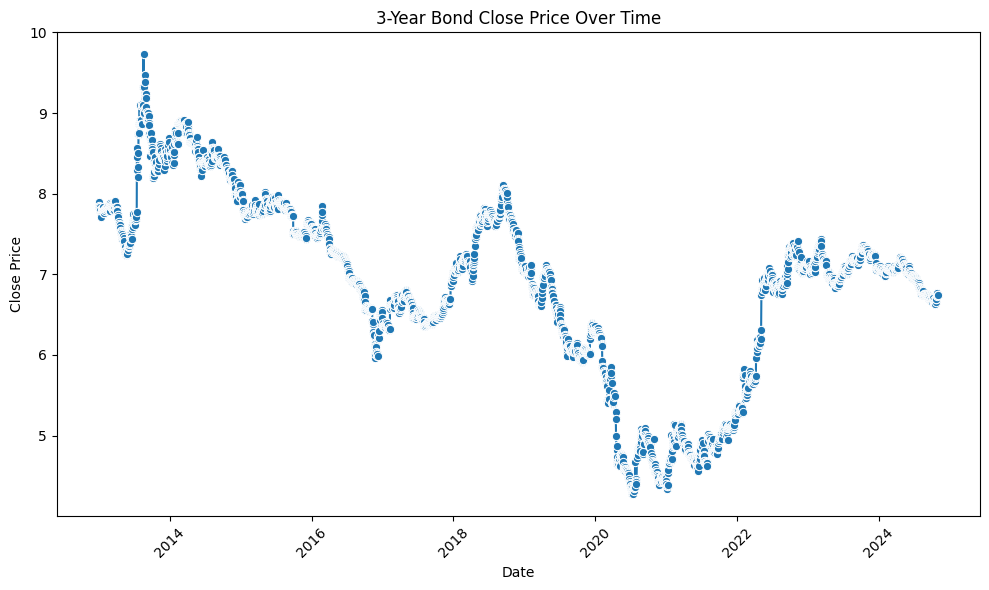

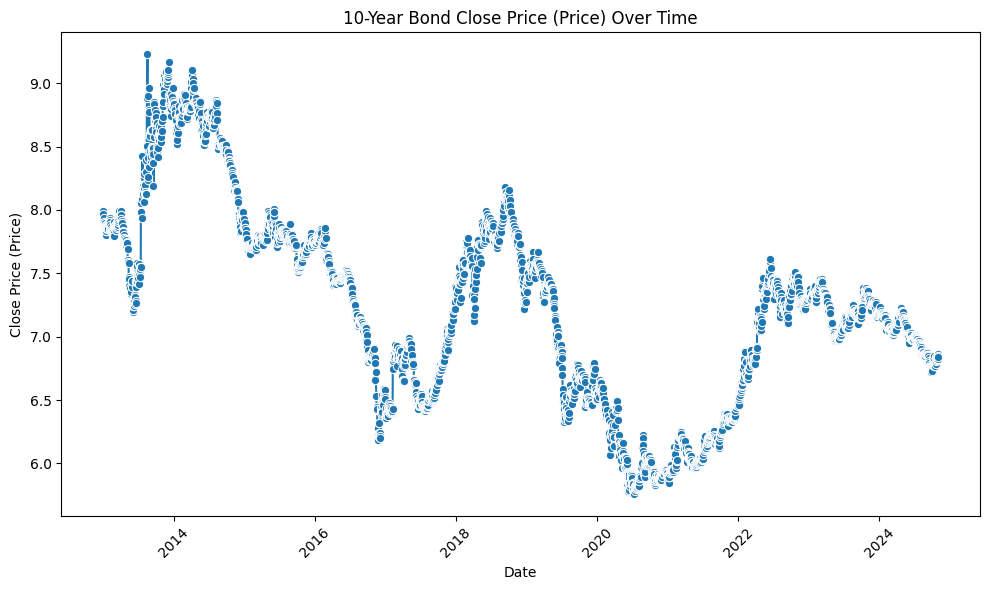

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
merged_data_3 = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')
merged_data_10 = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')

# Check and clean column names (remove leading/trailing spaces if any)
merged_data_3.columns = merged_data_3.columns.str.strip()
merged_data_10.columns = merged_data_10.columns.str.strip()

# Ensure 'Date' is in datetime format, specify the correct format
merged_data_3['Date'] = pd.to_datetime(merged_data_3['Date'], format='%d-%m-%Y')
merged_data_10['Date'] = pd.to_datetime(merged_data_10['Date'], format='%d-%m-%Y')

# Plotting for 3-Year Bond (using 'Close' as the target variable)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=merged_data_3, marker='o')
plt.title('3-Year Bond Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for 10-Year Bond (using 'Price' as the target variable)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Price', data=merged_data_10, marker='o')
plt.title('10-Year Bond Close Price (Price) Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (Price)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


MAPE: 0.0067
MAE: 0.0474
MSE: 0.0035
R²: 0.8923


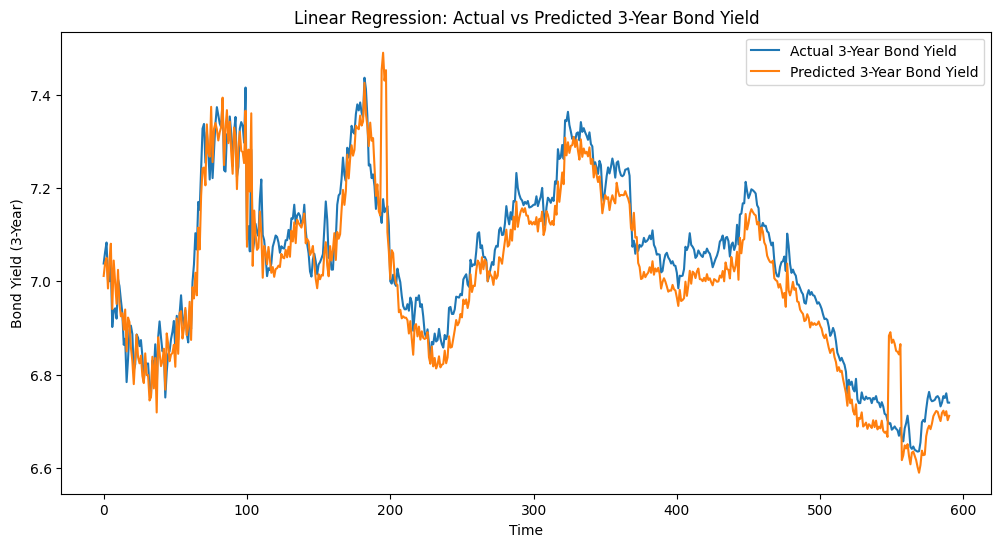

Total number of data: 2954
Total number of features: 24
Train data size: 2363 (Samples), 18 (Features)
Test data size: 591 (Samples), 18 (Features)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the merged dataset
file_path = '/content/drive/MyDrive/bond market dataset/merged_data_3.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names (remove extra spaces and newlines)
data.columns = data.columns.str.replace('\n', '').str.strip()



# Step 5: Define target and features
target_column = 'Close'  # The target variable
features = data[['Change %', 'Daily Return (%)', 'Volatility (7D)', 'SMA (7D)', 'SMA (30D)',
                 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                 'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)', 'Marginal Standing Facility (MSF) Rate (%)',
                 'Bank Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)', '182-Day Treasury Bill (Primary) Yield (%)',
                 '364-Day Treasury Bill (Primary) Yield (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                 'Policy Repo Rate (%)', 'Foreign Exchange Reserves (US $ Million)']]  # Relevant features

# Step 6: Train-test split (80% train, 20% test)
X = features.values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = lr_model.predict(X_test)

# Step 9: Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Step 10: Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual 3-Year Bond Yield')
plt.plot(y_pred, label='Predicted 3-Year Bond Yield')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bond Yield (3-Year)')
plt.title('Linear Regression: Actual vs Predicted 3-Year Bond Yield')
plt.show()
# Display the sizes of the datasets
print(f"Total number of data: {data.shape[0]}")
print(f"Total number of features: {data.shape[1] - 1}")  # Excluding the target column
print(f"Train data size: {X_train.shape[0]} (Samples), {X_train.shape[1]} (Features)")
print(f"Test data size: {X_test.shape[0]} (Samples), {X_test.shape[1]} (Features)")



In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.0 MB/s eta 0:00:00


Before Differencing:
ADF Statistic: -1.7058879759628052
p-value: 0.4280813964249041
Critical Value (1%): -3.432595306291141
Critical Value (5%): -2.862532026483452
Critical Value (10%): -2.5672980835802277
The series is not stationary.
After Differencing:
ADF Statistic: -8.705439033558921
p-value: 3.7111783562752077e-14
Critical Value (1%): -3.432595306291141
Critical Value (5%): -2.862532026483452
Critical Value (10%): -2.5672980835802277
The series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8909.991, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8904.777, Time=0.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8907.660, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8908.198, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8911.504, Time=0.95 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-8913.476, Time=0.31 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-8911.516, Time=1.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-8909.512, Time=0.81 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-8911.664, Time=0.36 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 4.343 seconds

Optimal ARIMA Parameters:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2942
Model:               SARIMAX(2, 0, 0)   Log Likelihood                4459.738
Date:                Thu, 26 Dec 2024   AIC                          -8913.476
Time:                        14:36:49   BIC                          -8895.515
Sample:                             0   HQIC                         -8907.009
                               - 2942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0428      0.008     -5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2942
Model:                 ARIMA(2, 0, 0)   Log Likelihood                4459.832
Date:                Thu, 26 Dec 2024   AIC                          -8911.664
Time:                        14:36:50   BIC                          -8887.717
Sample:                             0   HQIC                         -8903.042
                               - 2942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.399      0.690      -0.002       0.002
ar.L1         -0.0428      0.008     -5.274      0.000      -0.059      -0.027
ar.L2         -0.0516      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


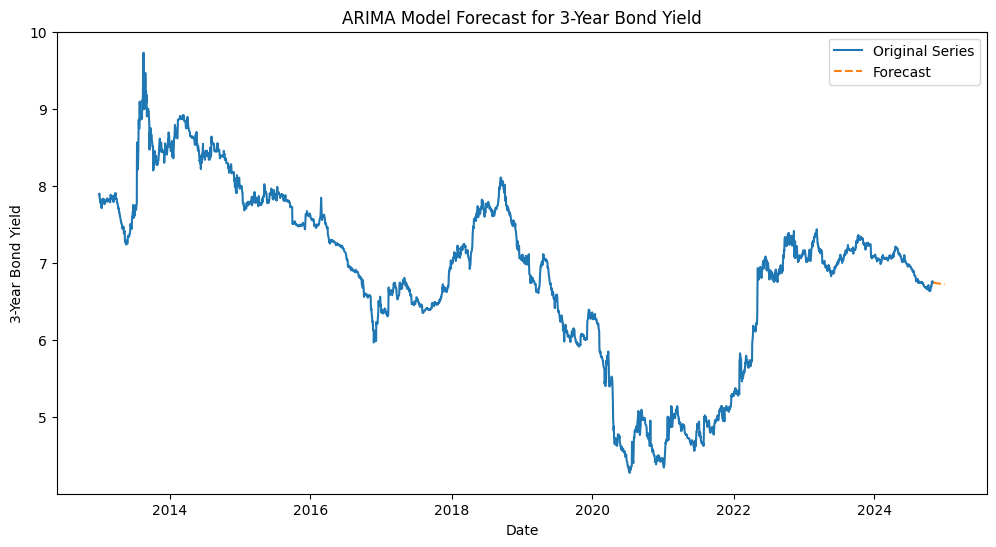

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

MAE (ARIMA): 0.1399
MSE (ARIMA): 0.0325
R² (ARIMA): -0.0517
MAPE (ARIMA): 0.0201


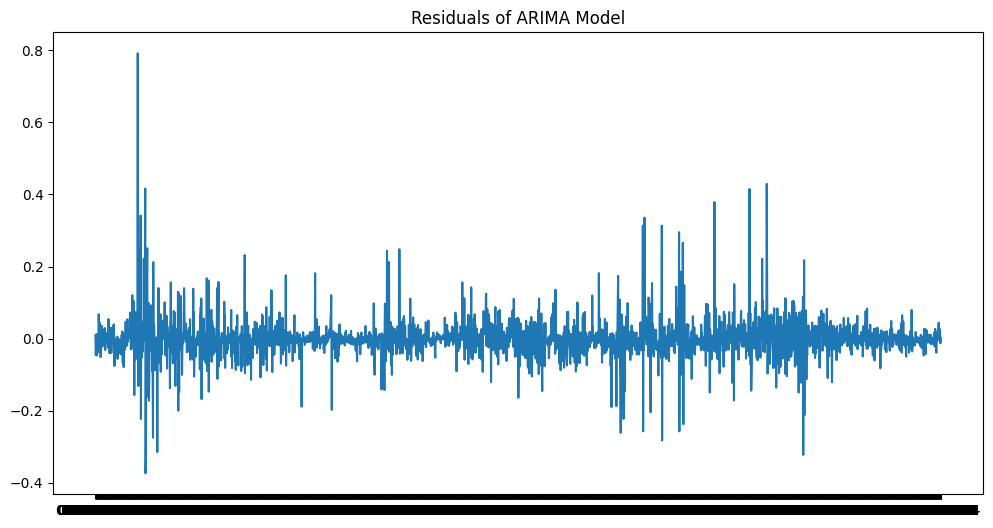

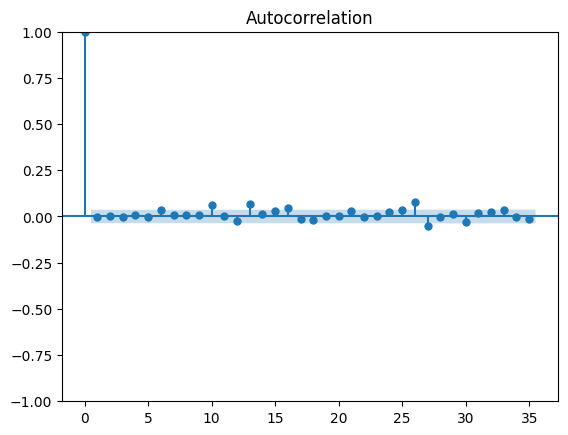

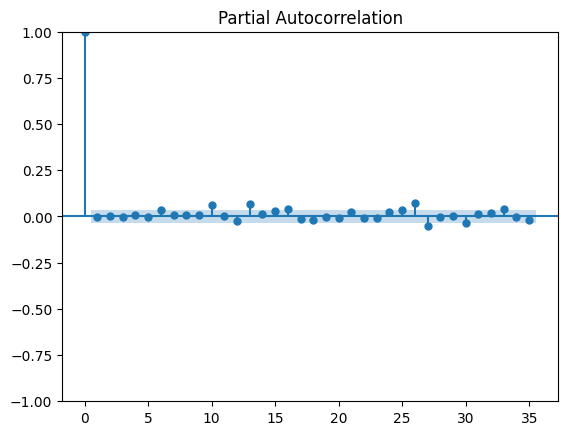

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv', parse_dates=['Date'], index_col='Date')

# Select the target variable (3-Year G-Sec Yield)
target = 'Close'
series = data[target]

# Step 2: Check for stationarity and difference if necessary
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

print("Before Differencing:")
check_stationarity(series)

# Differencing the series if needed
if adfuller(series)[1] > 0.05:  # If non-stationary
    series_diff = series.diff().dropna()
    print("After Differencing:")
    check_stationarity(series_diff)
else:
    series_diff = series  # Already stationary

# Step 3: Use auto_arima to find the best p, d, q parameters
stepwise_model = auto_arima(series_diff, start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            seasonal=False, trace=True, stepwise=True, suppress_warnings=True)

print("\nOptimal ARIMA Parameters:")
print(stepwise_model.summary())

# Extract optimal parameters
p, d, q = stepwise_model.order

# Step 4: Fit ARIMA model with the optimal parameters
model = ARIMA(series_diff, order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print("\nARIMA Model Summary:")
print(fitted_model.summary())

# Step 5: Forecast future values
forecast_steps = 60  # Increased number of steps to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Ensure the series index is parsed correctly with the correct date format
series.index = pd.to_datetime(series.index, dayfirst=True)

# Ensure that forecast_index is in the correct datetime format
forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Reverse the differencing (if necessary) by adding the last known value of the original series
if adfuller(series)[1] > 0.05:  # If differenced
    forecast_cumsum = np.cumsum(forecast) + series.iloc[-1]  # Add last value of original series
else:
    forecast_cumsum = forecast  # No differencing applied

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(series.index, series.values, label='Original Series')
plt.plot(forecast_index, forecast_cumsum, label='Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('3-Year Bond Yield')
plt.title('ARIMA Model Forecast for 3-Year Bond Yield')
plt.show()

# Step 6: Evaluate the model
# Split data into training and testing sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit ARIMA model on the training data
model_train = ARIMA(train, order=(3, 1, 4)).fit()

# Forecast on the test data
predictions = model_train.forecast(steps=len(test))

# Calculate Metrics
mae_arima = mean_absolute_error(test, predictions)
mse_arima = mean_squared_error(test, predictions)
r2_arima = r2_score(test, predictions)
mape_arima = mean_absolute_percentage_error(test, predictions)

print(f"MAE (ARIMA): {mae_arima:.4f}")
print(f"MSE (ARIMA): {mse_arima:.4f}")
print(f"R² (ARIMA): {r2_arima:.4f}")
print(f"MAPE (ARIMA): {mape_arima:.4f}")

# Step 7: Residual Diagnostics
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# ACF and PACF of residuals to check for autocorrelation
plot_acf(residuals)
plot_pacf(residuals)
plt.show()





Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0428 - val_loss: 0.0158
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 6.1953e-04
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.8790e-04 - val_loss: 6.5447e-04
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.8909e-04 - val_loss: 3.2137e-04
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.9026e-04 - val_loss: 2.3267e-04
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.0352e-04 - val_loss: 3.1106e-04
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.0182e-04 - val_loss: 2.7013e-04
Epoch 12/200
71/71 ━

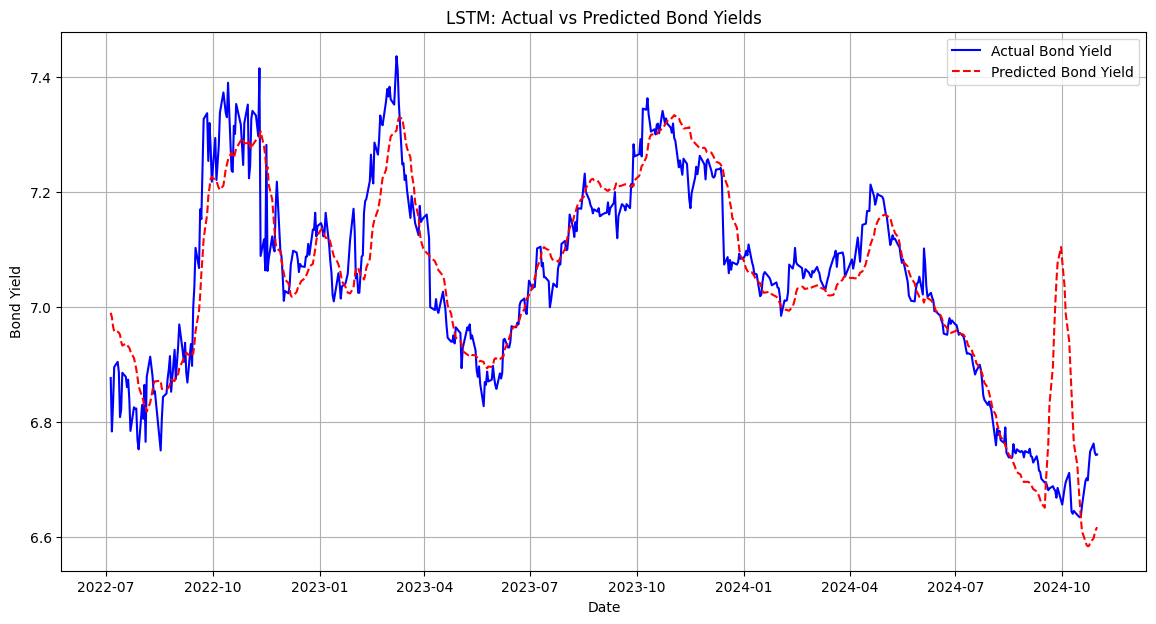

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')

# Feature Engineering: Add lag features and rolling statistics
for lag in [1, 7, 30]:  # Lag of 1, 7, and 30 days
    data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
data['Close_Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()
data['Close_Rolling_Std_7'] = data['Close'].rolling(window=7).std()

# Drop rows with NaN values introduced by lag/rolling operations
data = data.dropna()

# Feature Selection: Use all columns except 'Date' and 'Close'
selected_features = [col for col in data.columns if col != 'Date' and col != 'Close']
data = data[['Date'] + selected_features + ['Close']]

# Scale Data
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(data[selected_features])
scaled_target = target_scaler.fit_transform(data[['Close']])

# Combine target and features for sequence creation
scaled_data = np.hstack((scaled_target, scaled_features))

# Function to Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # All features except 'Close'
        y.append(data[i+seq_length, 0])     # 'Close' as target
    return np.array(X), np.array(y)

# Set Sequence Length
SEQ_LENGTH = 90  # Experiment with a 90-day sequence length

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Train-Test Split (80% Train, 20% Test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model Architecture: Optimized LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Increased units
model.add(Dropout(0.3))  # Adjusted dropout for regularization
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1))

# Compile Model
optimizer = Adam(learning_rate=0.0003)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Increased epochs
    batch_size=32,  # Smaller batch size
    callbacks=[early_stop],
    verbose=1
)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse Scaling
train_predictions_inv = target_scaler.inverse_transform(train_predictions)
test_predictions_inv = target_scaler.inverse_transform(test_predictions)
y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation Metrics
mse = mean_squared_error(y_test_inv, test_predictions_inv)
mae = mean_absolute_error(y_test_inv, test_predictions_inv)
r2 = r2_score(y_test_inv, test_predictions_inv)
mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-len(y_test_inv):], y_test_inv, label='Actual Bond Yield', color='blue')
plt.plot(data['Date'][-len(test_predictions_inv):], test_predictions_inv, label='Predicted Bond Yield', color='red', linestyle='--')
plt.title('LSTM: Actual vs Predicted Bond Yields')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid()
plt.show()


MAPE: 0.0108
MAE: 0.0762
MSE: 0.0092
R²: 0.7008


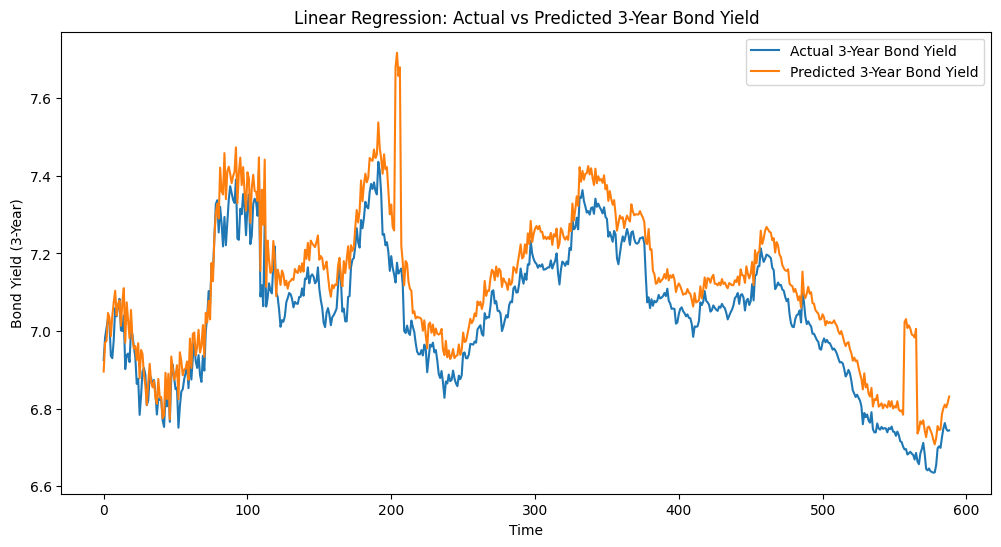

Total number of data: 2943
Total number of features: 24
Train data size: 2354 (Samples), 17 (Features)
Test data size: 589 (Samples), 17 (Features)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the merged dataset
file_path = '/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names (remove extra spaces and newlines)
data.columns = data.columns.str.replace('\n', '').str.strip()



# Step 5: Define target and features
target_column = 'Close'  # The target variable
features = data[['Change %', 'Daily Return (%)', 'Volatility (7D)', 'SMA (7D)', 'SMA (30D)',
                 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                 'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)', 'Marginal Standing Facility (MSF) Rate (%)',
                 'Bank Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)', '182-Day Treasury Bill (Primary) Yield (%)',
                  'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                 'Policy Repo Rate (%)', 'Foreign Exchange Reserves (US $ Million)']]  # Relevant features

# Step 6: Train-test split (80% train, 20% test)
X = features.values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = lr_model.predict(X_test)

# Step 9: Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Step 10: Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual 3-Year Bond Yield')
plt.plot(y_pred, label='Predicted 3-Year Bond Yield')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bond Yield (3-Year)')
plt.title('Linear Regression: Actual vs Predicted 3-Year Bond Yield')
plt.show()
# Display the sizes of the datasets
print(f"Total number of data: {data.shape[0]}")
print(f"Total number of features: {data.shape[1] - 1}")  # Excluding the target column
print(f"Train data size: {X_train.shape[0]} (Samples), {X_train.shape[1]} (Features)")
print(f"Test data size: {X_test.shape[0]} (Samples), {X_test.shape[1]} (Features)")



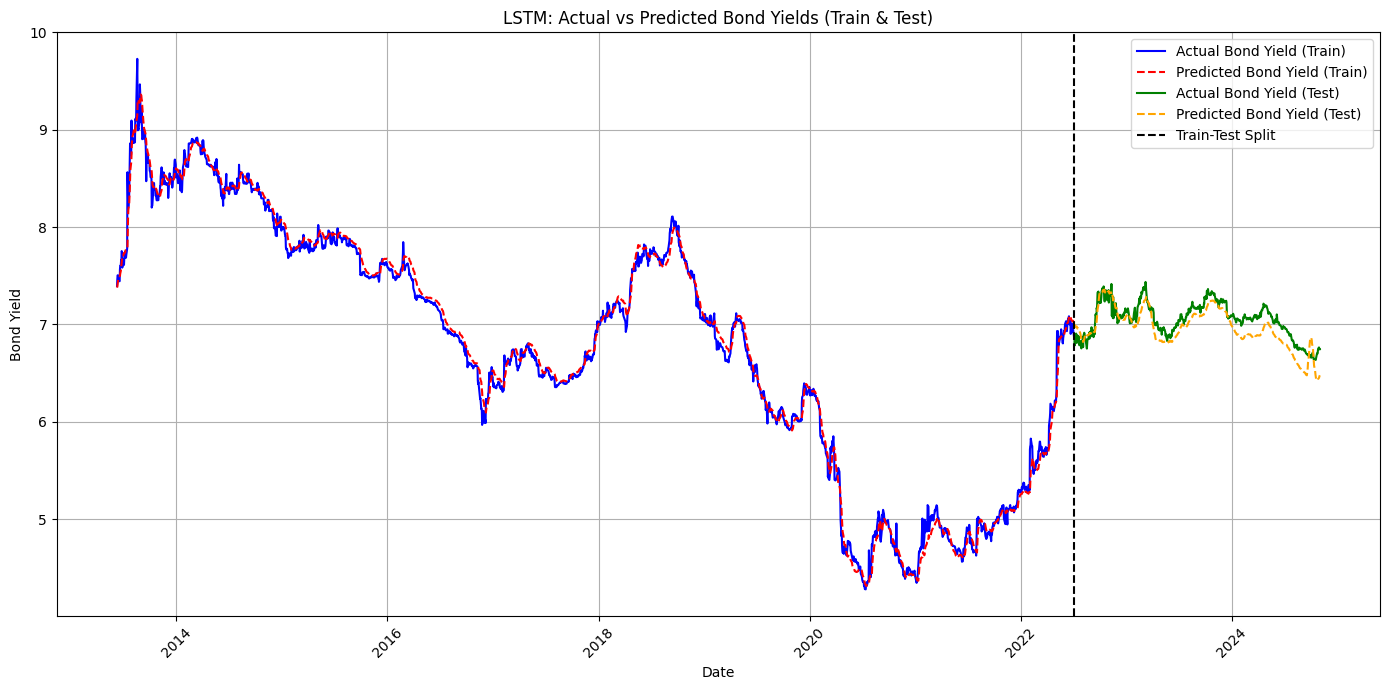

In [ ]:
# Combine train and test dates
train_dates = data['Date'][SEQ_LENGTH:split_index + SEQ_LENGTH]  # Dates for training data
test_dates = data['Date'][split_index + SEQ_LENGTH:]            # Dates for testing data
all_dates = np.concatenate([train_dates, test_dates])

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train_inv, label='Actual Bond Yield (Train)', color='blue')
plt.plot(train_dates, train_predictions_inv, label='Predicted Bond Yield (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test_inv, label='Actual Bond Yield (Test)', color='green')
plt.plot(test_dates, test_predictions_inv, label='Predicted Bond Yield (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('LSTM: Actual vs Predicted Bond Yields (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0259 - val_loss: 0.0016
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - val_loss: 7.0069e-04
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 2.7486e-04
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2169e-04 - val_loss: 3.1549e-04
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.9443e-04 - val_loss: 4.0988e-04
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.8732e-04 - val_loss: 4.1015e-04
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.4847e-04 - val_loss: 5.6998e-04
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.0220e-04 - val_loss: 7.3985e-04
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2622e-04 - val_loss: 6.3603e-04
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.7910e-04 - val_loss: 0.0010
Epoc

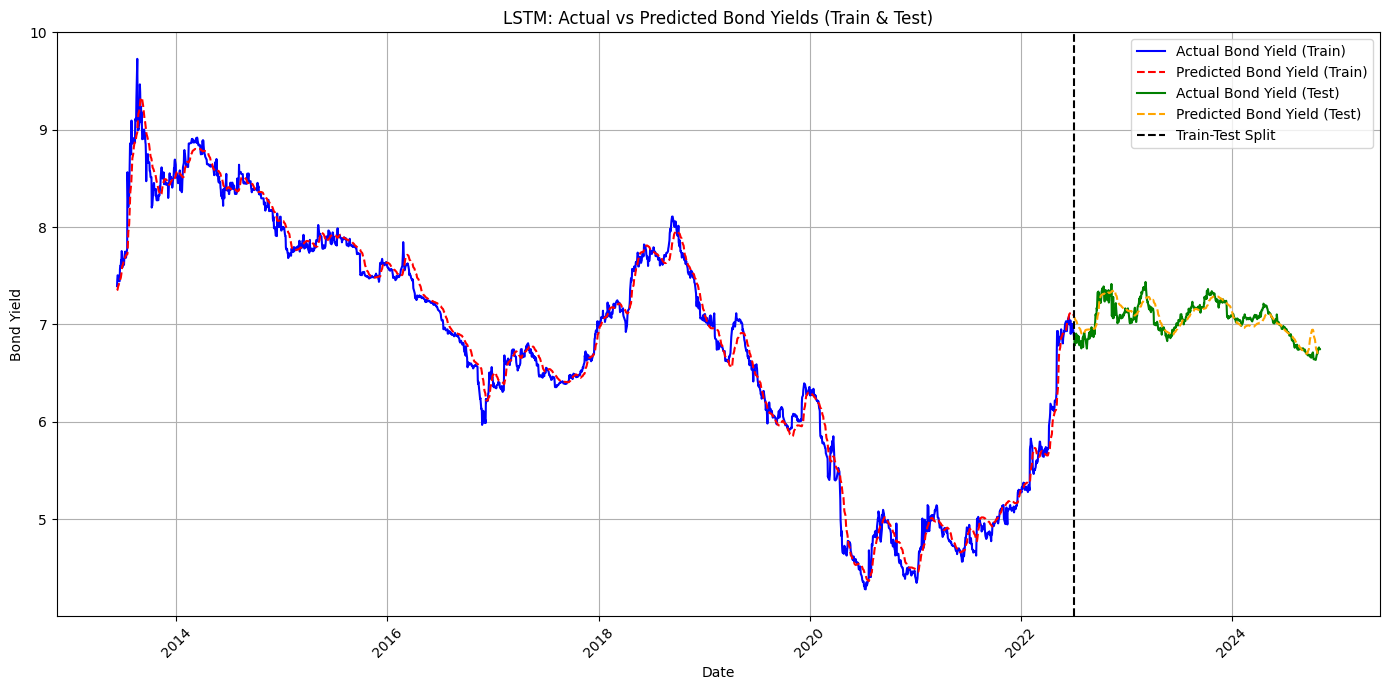

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')

# Feature Engineering: Add lag features and rolling statistics
for lag in [1, 7, 30]:  # Lag of 1, 7, and 30 days
    data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
data['Close_Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()
data['Close_Rolling_Std_7'] = data['Close'].rolling(window=7).std()

# Drop rows with NaN values introduced by lag/rolling operations
data = data.dropna()

# Feature Selection: Use all columns except 'Date' and 'Close'
selected_features = [col for col in data.columns if col != 'Date' and col != 'Close']
data = data[['Date'] + selected_features + ['Close']]

# Scale Data
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(data[selected_features])
scaled_target = target_scaler.fit_transform(data[['Close']])

# Combine target and features for sequence creation
scaled_data = np.hstack((scaled_target, scaled_features))

# Function to Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # All features except 'Close'
        y.append(data[i+seq_length, 0])     # 'Close' as target
    return np.array(X), np.array(y)

# Set Sequence Length
SEQ_LENGTH = 90  # Experiment with a 90-day sequence length

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Train-Test Split (80% Train, 20% Test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model Architecture: Optimized LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Increased units
model.add(Dropout(0.3))  # Adjusted dropout for regularization
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1))

# Compile Model
optimizer = Adam(learning_rate=0.0003)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Increased epochs
    batch_size=32,  # Smaller batch size
    callbacks=[early_stop],
    verbose=1
)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse Scaling
train_predictions_inv = target_scaler.inverse_transform(train_predictions)
test_predictions_inv = target_scaler.inverse_transform(test_predictions)
y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation Metrics
mse = mean_squared_error(y_test_inv, test_predictions_inv)
mae = mean_absolute_error(y_test_inv, test_predictions_inv)
r2 = r2_score(y_test_inv, test_predictions_inv)
mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

# Combine train and test dates
train_dates = data['Date'][SEQ_LENGTH:split_index + SEQ_LENGTH]  # Dates for training data
test_dates = data['Date'][split_index + SEQ_LENGTH:]            # Dates for testing data
all_dates = np.concatenate([train_dates, test_dates])

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train_inv, label='Actual Bond Yield (Train)', color='blue')
plt.plot(train_dates, train_predictions_inv, label='Predicted Bond Yield (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test_inv, label='Actual Bond Yield (Test)', color='green')
plt.plot(test_dates, test_predictions_inv, label='Predicted Bond Yield (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('LSTM: Actual vs Predicted Bond Yields (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()



MAPE: 0.0018
MAE: 0.0753
MSE: 0.0101
R²: 0.9890


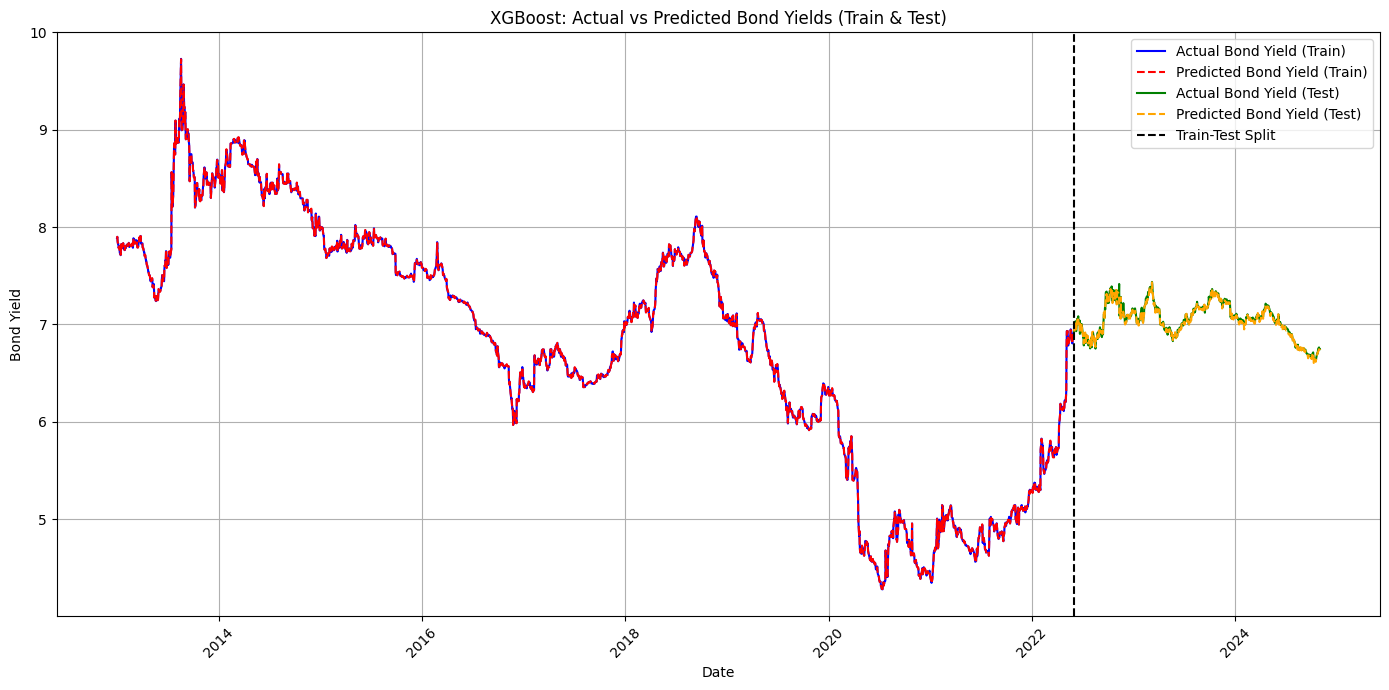

In [ ]:
#xgboost 3yr bond
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')  # Changed to 3-year bond dataset

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Step 2: Handle missing values and forward fill
data.ffill(inplace=True)

# Step 3: Handle percentage columns (convert to decimal values)
percentage_columns = ['Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
                      'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)']

# Clean up the percentage columns
for col in percentage_columns:
    # Replace '-' with '0', remove '%' sign, and convert to float
    data[col] = data[col].replace('-', '0')  # Replace '-' with '0'

    # Ensure the column is treated as a string before replacing '%'
    data[col] = data[col].astype(str).str.replace('%', '')  # Remove '%' sign

    # Convert to numeric, invalid parsing will be set as NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # Fill NaN values with 0
    data[col] = data[col].fillna(0)

# Step 4: Handle all other columns by converting to numeric
for col in data.columns:
    # Skip the 'Date' column and already cleaned percentage columns
    if col != 'Date' and col not in percentage_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(0)  # Fill NaN values with 0

# Step 5: Feature scaling using MinMaxScaler for features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.drop(columns=['Date', 'Close']))  # Dropping Date and Close for scaling

# Step 6: Split data into features and target
X = scaled_data  # All columns except 'Date' and 'Close'
y = data['Close']  # Target column 'Close' for the 3-year bond dataset

# Step 7: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Define the XGBoost model with manually specified hyperparameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Step 9: Evaluate the model performance
predicted_yields = xgb_model.predict(X_test)

# Create a separate scaler for the target (Close) column
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(data[['Close']])

# Inverse scale the predicted and actual values
predicted_yields_rescaled = target_scaler.inverse_transform(predicted_yields.reshape(-1, 1))
y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))  # Convert to NumPy array and reshape

# Step 10: Calculate performance metrics
mape = mean_absolute_percentage_error(y_test_rescaled, predicted_yields_rescaled)
mae = mean_absolute_error(y_test_rescaled, predicted_yields_rescaled)
mse = mean_squared_error(y_test_rescaled, predicted_yields_rescaled)
r2 = r2_score(y_test_rescaled, predicted_yields_rescaled)

print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Combine train and test dates
train_dates = data['Date'][:len(X_train)]  # Dates for training data
test_dates = data['Date'][len(X_train):]   # Dates for testing data

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train.values, label='Actual Bond Yield (Train)', color='blue')
plt.plot(train_dates, xgb_model.predict(X_train), label='Predicted Bond Yield (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test.values, label='Actual Bond Yield (Test)', color='green')
plt.plot(test_dates, predicted_yields, label='Predicted Bond Yield (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('XGBoost: Actual vs Predicted Bond Yields (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()




MAPE: 0.0053
MAE: 0.0380
MSE: 0.0023
R²: 0.9321


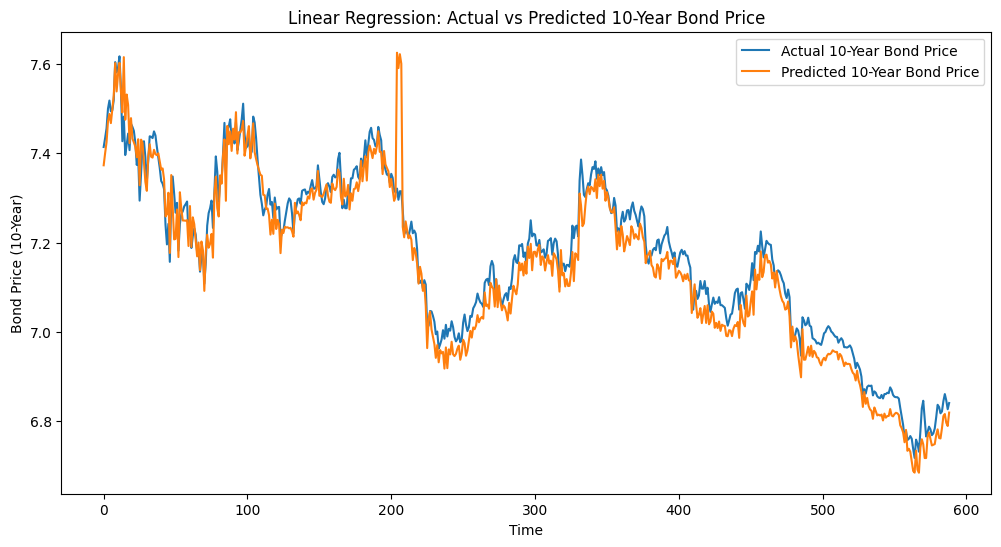

Total number of data: 2945
Total number of features: 24
Train data size: 2356 (Samples), 18 (Features)
Test data size: 589 (Samples), 18 (Features)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the merged dataset
file_path = '/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names (remove extra spaces and newlines)
data.columns = data.columns.str.replace('\n', '').str.strip()

# Step 3: Handle percentage columns separately for conversion to numerical values
percentage_columns = [
    'Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
    'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)'
]

# Function to convert percentage columns to float, ensuring negative values are preserved
def convert_percentage_to_float(df, column_name):
    df[column_name] = df[column_name].replace('%', '', regex=True).astype(float) / 100.0
    return df

# Apply the conversion for percentage columns
for col in percentage_columns:
    data = convert_percentage_to_float(data, col)

# Step 4: Replace any non-numeric entries with NaN (like '-')
data = data.apply(pd.to_numeric, errors='coerce')

# Step 5: Handle missing values by filling NaN with 0 or another strategy
data = data.fillna(0)  # You can also use forward fill: data.fillna(method='ffill')

# Step 6: Define target and features
target_column = 'Price'  # The target variable
features = data[['Change %', 'Daily Return (%)', 'Volatility (7D)', 'SMA (7D)', 'SMA (30D)',
                 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                 'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)', 'Marginal Standing Facility (MSF) Rate (%)',
                 'Bank Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)', '182-Day Treasury Bill (Primary) Yield (%)',
                 '364-Day Treasury Bill (Primary) Yield (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                 'Policy Repo Rate (%)', 'Foreign Exchange Reserves (US $ Million)']]  # Relevant features

# Step 7: Train-test split (80% train, 20% test)
X = features.values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = lr_model.predict(X_test)

# Step 10: Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Step 11: Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual 10-Year Bond Price')
plt.plot(y_pred, label='Predicted 10-Year Bond Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bond Price (10-Year)')
plt.title('Linear Regression: Actual vs Predicted 10-Year Bond Price')
plt.show()

# Display the sizes of the datasets
print(f"Total number of data: {data.shape[0]}")
print(f"Total number of features: {data.shape[1] - 1}")  # Excluding the target column
print(f"Train data size: {X_train.shape[0]} (Samples), {X_train.shape[1]} (Features)")
print(f"Test data size: {X_test.shape[0]} (Samples), {X_test.shape[1]} (Features)")


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.5 MB/s eta 0:00:00


Before Differencing:
ADF Statistic: -1.6218200536565917
p-value: 0.47177524270261184
Critical Value (1%): -3.432594535616418
Critical Value (5%): -2.8625316861103984
Critical Value (10%): -2.567297902368278
The series is not stationary.
After Differencing:
ADF Statistic: -9.95654328793535
p-value: 2.43570258558786e-17
Critical Value (1%): -3.432594535616418
Critical Value (5%): -2.8625316861103984
Critical Value (10%): -2.567297902368278
The series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9470.148, Time=2.50 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9460.850, Time=0.67 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9459.782, Time=0.66 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9459.927, Time=1.90 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9490.734, Time=1.72 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9471.979, Time=0.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-9491.851, Time=1.43 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-9486.777, Time=0.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-9486.904, Time=0.74 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-9491.953, Time=2.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-9493.187, Time=1.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9488.654, Time=1.73 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-9491.279, Time=4.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-9490.286, Time=0.61 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-9488.997, Time=3.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-9491.466, Time=3.44 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 27.043 seconds

Optimal ARIMA Parameters:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2944
Model:               SARIMAX(2, 0, 2)   Log Likelihood                4751.594
Date:                Mon, 30 Dec 2024   AIC                          -9493.187
Time:                        12:48:26   BIC                          -9463.250
Sample:                             0   HQIC                         -9482.409
                               - 2944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0309      0.070     1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2944
Model:                 ARIMA(2, 0, 2)   Log Likelihood                4751.732
Date:                Mon, 30 Dec 2024   AIC                          -9491.465
Time:                        12:48:30   BIC                          -9455.539
Sample:                             0   HQIC                         -9478.530
                               - 2944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.497      0.619      -0.002       0.001
ar.L1          1.0314      0.071     14.573      0.000       0.893       1.170
ar.L2         -0.4550      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


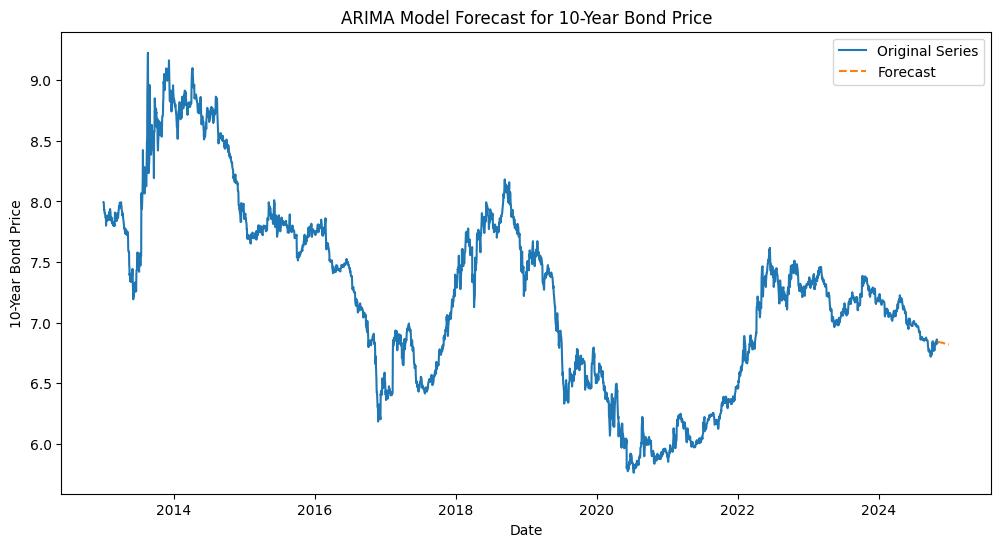

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

MAE (ARIMA): 0.2551
MSE (ARIMA): 0.0968
R² (ARIMA): -1.8212
MAPE (ARIMA): 0.0362


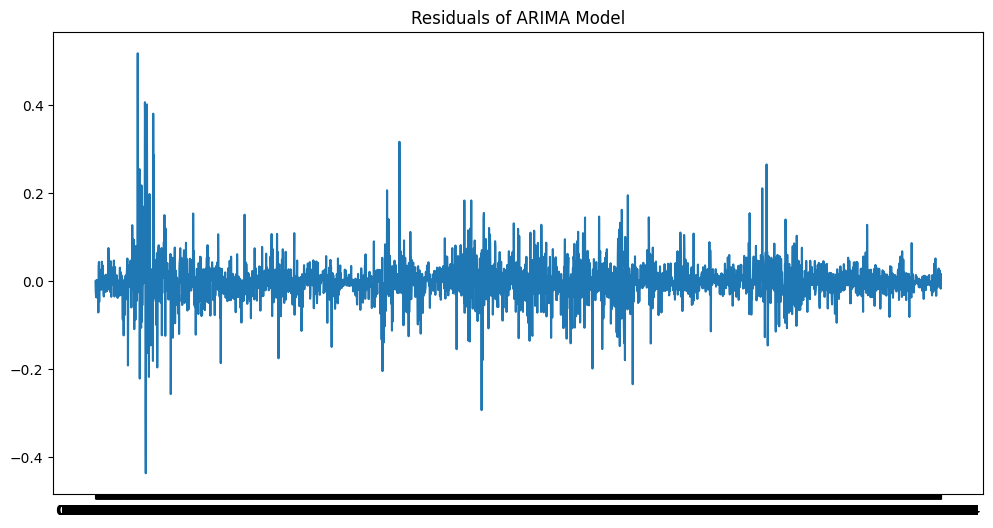

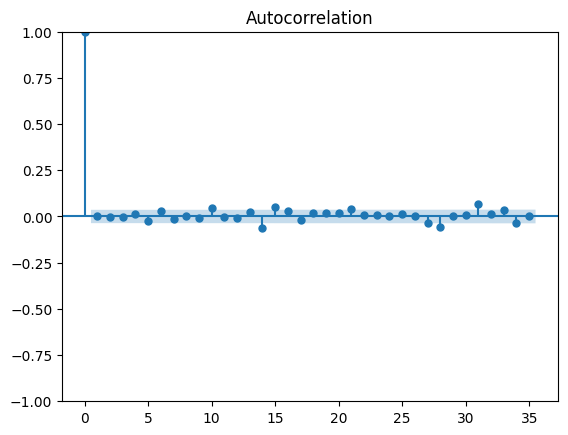

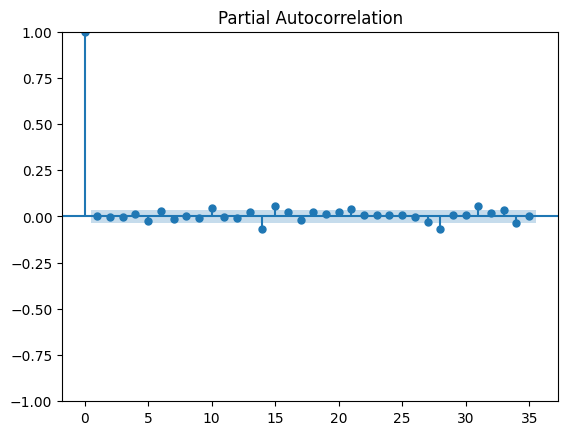

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv', parse_dates=['Date'], index_col='Date')

# Select the target variable (10-Year G-Sec Yield)
target = 'Price'  # For 10-year bond, the target is 'Price'
series = data[target]

# Step 2: Check for stationarity and difference if necessary
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

print("Before Differencing:")
check_stationarity(series)

# Differencing the series if needed
if adfuller(series)[1] > 0.05:  # If non-stationary
    series_diff = series.diff().dropna()
    print("After Differencing:")
    check_stationarity(series_diff)
else:
    series_diff = series  # Already stationary

# Step 3: Use auto_arima to find the best p, d, q parameters
stepwise_model = auto_arima(series_diff, start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            seasonal=False, trace=True, stepwise=True, suppress_warnings=True)

print("\nOptimal ARIMA Parameters:")
print(stepwise_model.summary())

# Extract optimal parameters
p, d, q = stepwise_model.order

# Step 4: Fit ARIMA model with the optimal parameters
model = ARIMA(series_diff, order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print("\nARIMA Model Summary:")
print(fitted_model.summary())

# Step 5: Forecast future values
forecast_steps = 60  # Increased number of steps to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Ensure the series index is parsed correctly with the correct date format
series.index = pd.to_datetime(series.index, dayfirst=True)

# Ensure that forecast_index is in the correct datetime format
forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Reverse the differencing (if necessary) by adding the last known value of the original series
if adfuller(series)[1] > 0.05:  # If differenced
    forecast_cumsum = np.cumsum(forecast) + series.iloc[-1]  # Add last value of original series
else:
    forecast_cumsum = forecast  # No differencing applied

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(series.index, series.values, label='Original Series')
plt.plot(forecast_index, forecast_cumsum, label='Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('10-Year Bond Price')
plt.title('ARIMA Model Forecast for 10-Year Bond Price')
plt.show()

# Step 6: Evaluate the model
# Split data into training and testing sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit ARIMA model on the training data
model_train = ARIMA(train, order=(p, d, q)).fit()

# Forecast on the test data
predictions = model_train.forecast(steps=len(test))

# Calculate Metrics
mae_arima = mean_absolute_error(test, predictions)
mse_arima = mean_squared_error(test, predictions)
r2_arima = r2_score(test, predictions)
mape_arima = mean_absolute_percentage_error(test, predictions)

print(f"MAE (ARIMA): {mae_arima:.4f}")
print(f"MSE (ARIMA): {mse_arima:.4f}")
print(f"R² (ARIMA): {r2_arima:.4f}")
print(f"MAPE (ARIMA): {mape_arima:.4f}")

# Step 7: Residual Diagnostics
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# ACF and PACF of residuals to check for autocorrelation
plot_acf(residuals)
plot_pacf(residuals)
plt.show()


<ipython-input-121-da8bfc40d35f>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0355 - val_loss: 7.5730e-04
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0024 - val_loss: 4.7151e-04
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 9.2085e-04
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 8.4410e-04
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.1360e-04 - val_loss: 0.0036
Epoch 12/200
71/71 ━━━━━━━━━━━━━

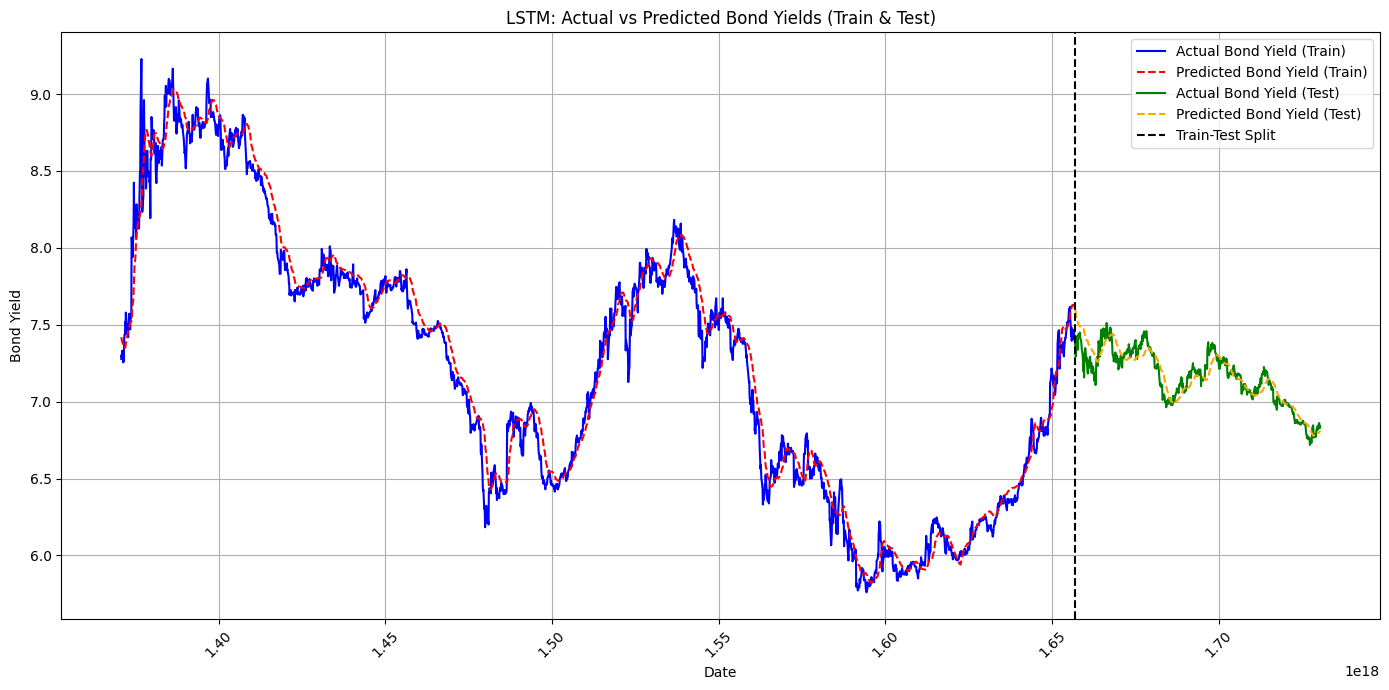

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')

# Handle '-' values by forward filling
data.replace('-', np.nan, inplace=True)  # Replace '-' with NaN
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coerce errors to NaN
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Feature Engineering: Add lag features and rolling statistics
for lag in [1, 7, 30]:  # Lag of 1, 7, and 30 days
    data[f'Price_Lag_{lag}'] = data['Price'].shift(lag)
data['Price_Rolling_Mean_7'] = data['Price'].rolling(window=7).mean()
data['Price_Rolling_Std_7'] = data['Price'].rolling(window=7).std()

# Drop rows with NaN values introduced by lag/rolling operations
data = data.dropna()

# Feature Selection: Use all columns except 'Date' and 'Price'
selected_features = [col for col in data.columns if col != 'Date' and col != 'Price']
data = data[['Date'] + selected_features + ['Price']]

# Scale Data
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(data[selected_features])
scaled_target = target_scaler.fit_transform(data[['Price']])

# Combine target and features for sequence creation
scaled_data = np.hstack((scaled_target, scaled_features))

# Function to Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # All features except 'Price'
        y.append(data[i+seq_length, 0])     # 'Price' as target
    return np.array(X), np.array(y)

# Set Sequence Length
SEQ_LENGTH = 90  # Experiment with a 90-day sequence length

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Train-Test Split (80% Train, 20% Test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model Architecture: Optimized LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Increased units
model.add(Dropout(0.3))  # Adjusted dropout for regularization
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1))

# Compile Model
optimizer = Adam(learning_rate=0.0003)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Increased epochs
    batch_size=32,  # Smaller batch size
    callbacks=[early_stop],
    verbose=1
)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse Scaling
train_predictions_inv = target_scaler.inverse_transform(train_predictions)
test_predictions_inv = target_scaler.inverse_transform(test_predictions)
y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation Metrics
mse = mean_squared_error(y_test_inv, test_predictions_inv)
mae = mean_absolute_error(y_test_inv, test_predictions_inv)
r2 = r2_score(y_test_inv, test_predictions_inv)
mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

# Combine train and test dates
train_dates = data['Date'][SEQ_LENGTH:split_index + SEQ_LENGTH]  # Dates for training data
test_dates = data['Date'][split_index + SEQ_LENGTH:]            # Dates for testing data
all_dates = np.concatenate([train_dates, test_dates])

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train_inv, label='Actual Bond Yield (Train)', color='blue')
plt.plot(train_dates, train_predictions_inv, label='Predicted Bond Yield (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test_inv, label='Actual Bond Yield (Test)', color='green')
plt.plot(test_dates, test_predictions_inv, label='Predicted Bond Yield (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('LSTM: Actual vs Predicted Bond Yields (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()


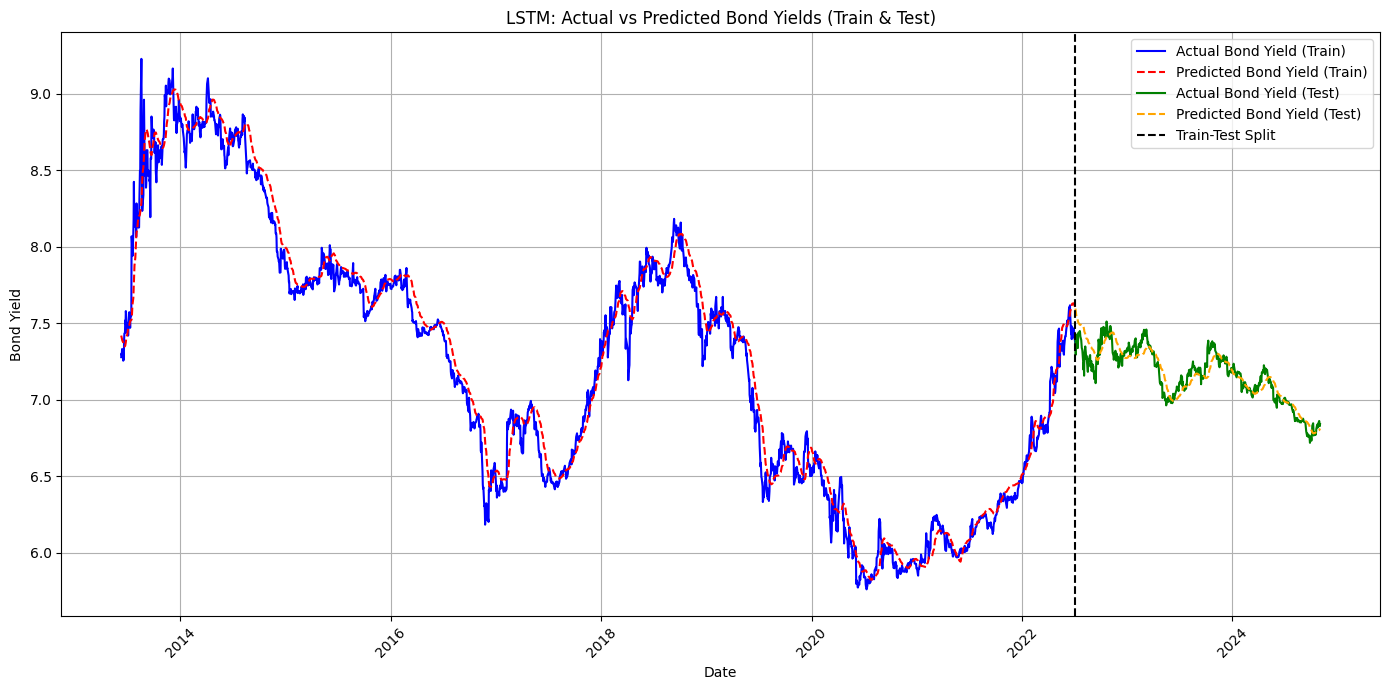

In [ ]:
# Ensure that the 'Date' columns are in datetime format
train_dates = pd.to_datetime(data['Date'][SEQ_LENGTH:split_index + SEQ_LENGTH])
test_dates = pd.to_datetime(data['Date'][split_index + SEQ_LENGTH:])

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_dates, y_train_inv, label='Actual Bond Yield (Train)', color='blue')
plt.plot(train_dates, train_predictions_inv, label='Predicted Bond Yield (Train)', color='red', linestyle='--')

# Plot testing data
plt.plot(test_dates, y_test_inv, label='Actual Bond Yield (Test)', color='green')
plt.plot(test_dates, test_predictions_inv, label='Predicted Bond Yield (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

# Add title and labels
plt.title('LSTM: Actual vs Predicted Bond Yields (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Yield')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Epoch 1/200


<ipython-input-125-a61dc232085f>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0229 - val_loss: 0.0024
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 5.2372e-04
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 5.8154e-04
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - val_loss: 2.9504e-04
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.9960e-04 - val_loss: 7.0454e-04
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010 - val_loss: 4.2083e-04
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0010 - val_loss: 3.0242e-04
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.8802e-04 - val_loss: 6.8625e-04
Epoch 12/200
71/71 ━━━━━━━━━

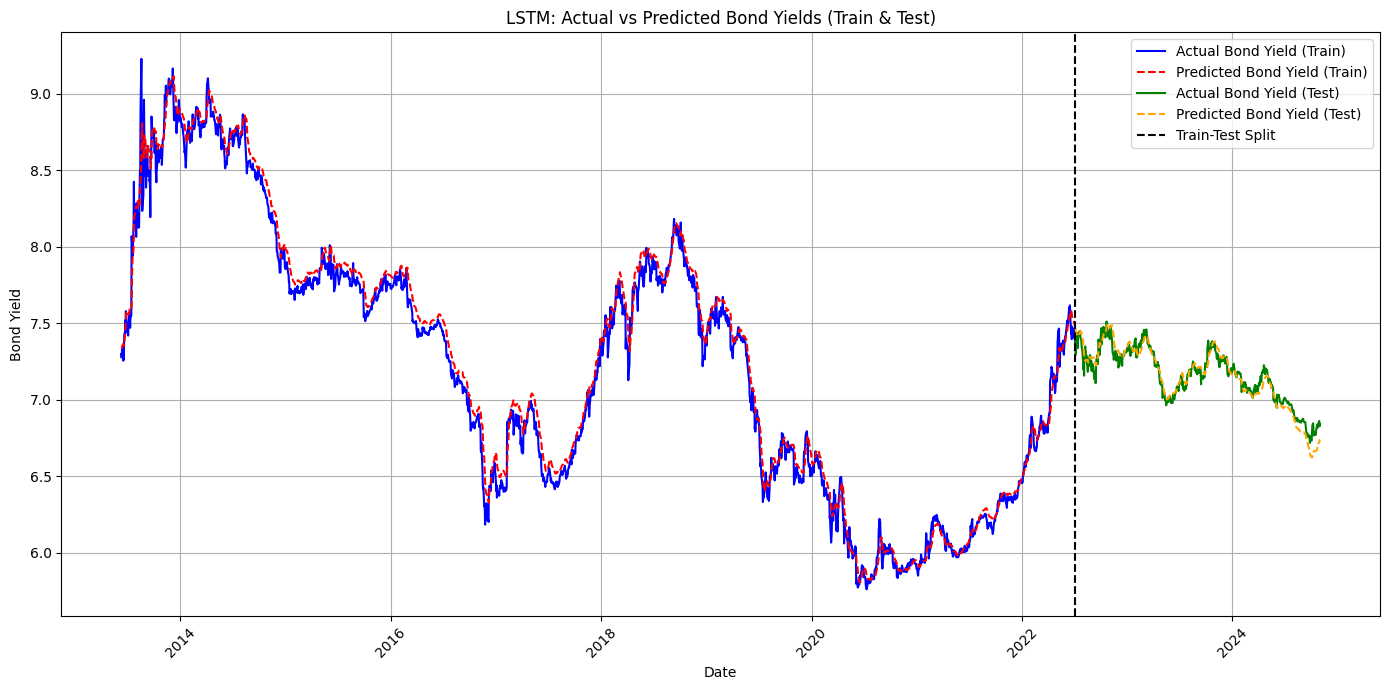

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')

# Handle '-' values by forward filling
data.replace('-', np.nan, inplace=True)  # Replace '-' with NaN
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coerce errors to NaN
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Feature Engineering: Add lag features and rolling statistics
for lag in [1, 7, 30]:  # Lag of 1, 7, and 30 days
    data[f'Price_Lag_{lag}'] = data['Price'].shift(lag)
data['Price_Rolling_Mean_7'] = data['Price'].rolling(window=7).mean()
data['Price_Rolling_Std_7'] = data['Price'].rolling(window=7).std()

# Drop rows with NaN values introduced by lag/rolling operations
data = data.dropna()

# Feature Selection: Use all columns except 'Date' and 'Price'
selected_features = [col for col in data.columns if col != 'Date' and col != 'Price']
data = data[['Date'] + selected_features + ['Price']]

# Scale Data
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(data[selected_features])
scaled_target = target_scaler.fit_transform(data[['Price']])

# Combine target and features for sequence creation
scaled_data = np.hstack((scaled_target, scaled_features))

# Function to Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # All features except 'Price'
        y.append(data[i+seq_length, 0])     # 'Price' as target
    return np.array(X), np.array(y)

# Set Sequence Length
SEQ_LENGTH = 90  # Experiment with a 90-day sequence length

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Train-Test Split (80% Train, 20% Test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model Architecture: Optimized LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Increased units
model.add(Dropout(0.3))  # Adjusted dropout for regularization
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1))

# Compile Model
optimizer = Adam(learning_rate=0.0003)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Increased epochs
    batch_size=32,  # Smaller batch size
    callbacks=[early_stop],
    verbose=1
)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse Scaling
train_predictions_inv = target_scaler.inverse_transform(train_predictions)
test_predictions_inv = target_scaler.inverse_transform(test_predictions)
y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation Metrics
mse = mean_squared_error(y_test_inv, test_predictions_inv)
mae = mean_absolute_error(y_test_inv, test_predictions_inv)
r2 = r2_score(y_test_inv, test_predictions_inv)
mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

# Ensure that the 'Date' columns are in datetime format
train_dates = pd.to_datetime(data['Date'][SEQ_LENGTH:split_index + SEQ_LENGTH])
test_dates = pd.to_datetime(data['Date'][split_index + SEQ_LENGTH:])

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_dates, y_train_inv, label='Actual Bond Yield (Train)', color='blue')
plt.plot(train_dates, train_predictions_inv, label='Predicted Bond Yield (Train)', color='red', linestyle='--')

# Plot testing data
plt.plot(test_dates, y_test_inv, label='Actual Bond Yield (Test)', color='green')
plt.plot(test_dates, test_predictions_inv, label='Predicted Bond Yield (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

# Add title and labels
plt.title('LSTM: Actual vs Predicted Bond Yields (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Yield')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


MAPE: 0.0117
MAE: 0.0833
MSE: 0.0080
R²: 0.7663


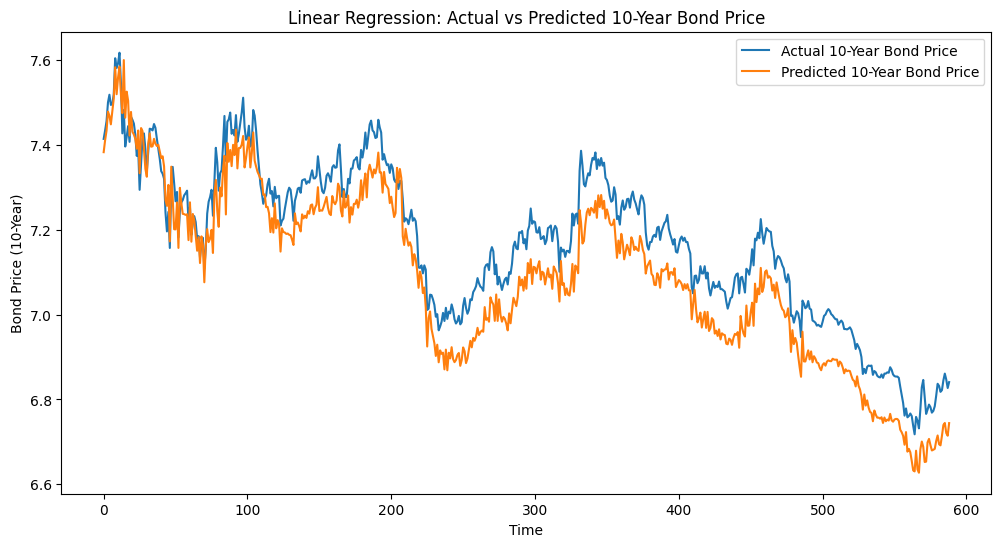

Total number of data: 2945
Total number of features: 24
Train data size: 2356 (Samples), 16 (Features)
Test data size: 589 (Samples), 16 (Features)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the merged dataset
file_path = '/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names (remove extra spaces and newlines)
data.columns = data.columns.str.replace('\n', '').str.strip()

# Step 3: Handle percentage columns separately for conversion to numerical values
percentage_columns = [
    'Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
    'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)'
]

# Function to convert percentage columns to float, ensuring negative values are preserved
def convert_percentage_to_float(df, column_name):
    df[column_name] = df[column_name].replace('%', '', regex=True).astype(float) / 100.0
    return df

# Apply the conversion for percentage columns
for col in percentage_columns:
    data = convert_percentage_to_float(data, col)

# Step 4: Replace any non-numeric entries with NaN (like '-')
data = data.apply(pd.to_numeric, errors='coerce')

# Step 5: Handle missing values by filling NaN with 0 or another strategy
data = data.fillna(0)  # You can also use forward fill: data.fillna(method='ffill')

# Step 6: Define target and features
target_column = 'Price'  # The target variable
features = data[['Change %', 'Daily Return (%)', 'Volatility (7D)', 'SMA (7D)',
                 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                  'Reverse Repo Rate (%)', 'Marginal Standing Facility (MSF) Rate (%)',
                 'Bank Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)', '182-Day Treasury Bill (Primary) Yield (%)',
                 '364-Day Treasury Bill (Primary) Yield (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                 'Policy Repo Rate (%)', 'Foreign Exchange Reserves (US $ Million)']]  # Relevant features

# Step 7: Train-test split (80% train, 20% test)
X = features.values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = lr_model.predict(X_test)

# Step 10: Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Step 11: Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual 10-Year Bond Price')
plt.plot(y_pred, label='Predicted 10-Year Bond Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bond Price (10-Year)')
plt.title('Linear Regression: Actual vs Predicted 10-Year Bond Price')
plt.show()

# Display the sizes of the datasets
print(f"Total number of data: {data.shape[0]}")
print(f"Total number of features: {data.shape[1] - 1}")  # Excluding the target column
print(f"Train data size: {X_train.shape[0]} (Samples), {X_train.shape[1]} (Features)")
print(f"Test data size: {X_test.shape[0]} (Samples), {X_test.shape[1]} (Features)")


MAPE: 0.0114
MAE: 0.0817
MSE: 0.0077
R²: 0.7743


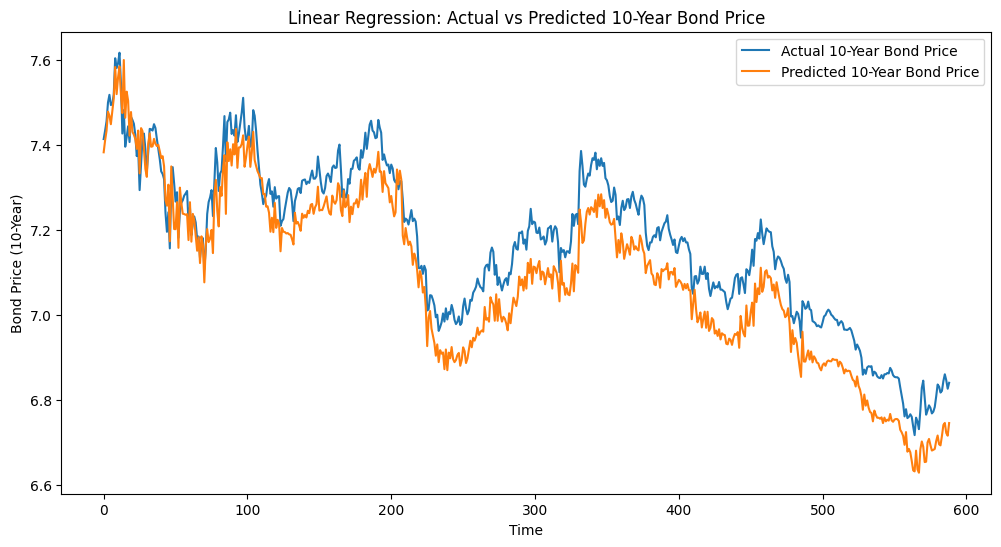

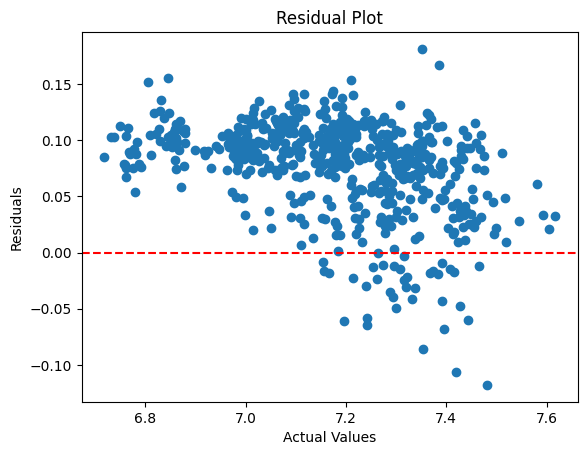

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the merged dataset
file_path = '/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names (remove extra spaces and newlines)
data.columns = data.columns.str.replace('\n', '').str.strip()

# Step 3: Handle percentage columns separately for conversion to numerical values
percentage_columns = [
    'Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
    'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)'
]

# Function to convert percentage columns to float, ensuring negative values are preserved
def convert_percentage_to_float(df, column_name):
    df[column_name] = df[column_name].replace('%', '', regex=True).astype(float) / 100.0
    return df

# Apply the conversion for percentage columns
for col in percentage_columns:
    data = convert_percentage_to_float(data, col)

# Step 4: Replace any non-numeric entries with NaN (like '-')
data = data.apply(pd.to_numeric, errors='coerce')

# Step 5: Handle missing values by filling NaN with 0 or another strategy
data = data.fillna(0)  # You can also use forward fill: data.fillna(method='ffill')

# Step 6: Define target and features
target_column = 'Price'  # The target variable
features = data[['Change %', 'Daily Return (%)', 'Volatility (7D)', 'SMA (7D)',
                 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)',
                  'Reverse Repo Rate (%)', 'Marginal Standing Facility (MSF) Rate (%)',
                 'Bank Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)', '182-Day Treasury Bill (Primary) Yield (%)',
                 '364-Day Treasury Bill (Primary) Yield (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                 'Policy Repo Rate (%)', 'Foreign Exchange Reserves (US $ Million)']]  # Relevant features

# Step 7: Train-test split (80% train, 20% test)
X = features.values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = lr_model.predict(X_test)

# Step 10: Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Step 11: Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual 10-Year Bond Price')
plt.plot(y_pred, label='Predicted 10-Year Bond Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bond Price (10-Year)')
plt.title('Linear Regression: Actual vs Predicted 10-Year Bond Price')
plt.show()

import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



MAPE: 0.0013
MAE: 0.0398
MSE: 0.0026
R²: 0.9938


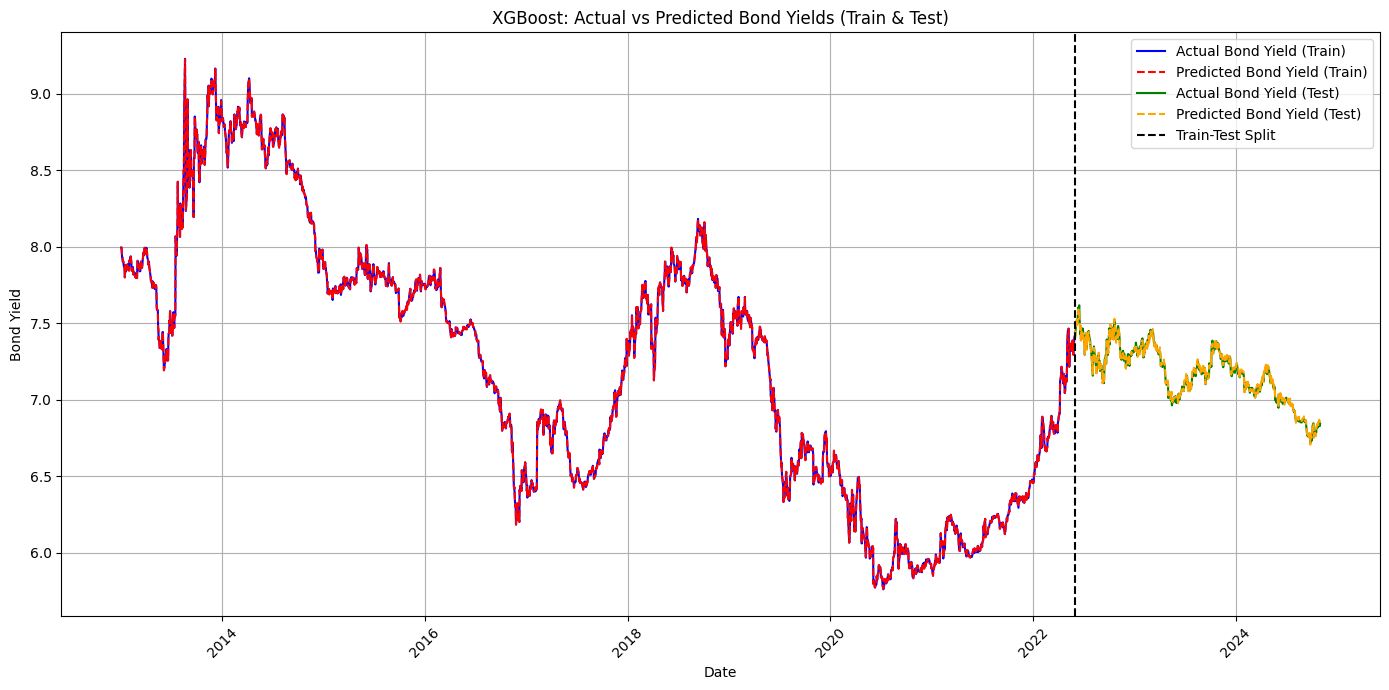

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')  # Changed to 10-year bond dataset

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Step 2: Handle missing values using forward fill
data.ffill(inplace=True)

# Step 3: Handle percentage columns (convert to decimal values)
percentage_columns = ['Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
                      'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)']

# Clean up the percentage columns
for col in percentage_columns:
    # Replace '-' with '0', remove '%' sign, and convert to float
    data[col] = data[col].replace('-', '0')  # Replace '-' with '0'

    # Ensure the column is treated as a string before replacing '%'
    data[col] = data[col].astype(str).str.replace('%', '')  # Remove '%' sign

    # Convert to numeric, invalid parsing will be set as NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # Fill NaN values with forward fill
    data[col] = data[col].ffill()

# Step 4: Handle all other columns by converting to numeric
for col in data.columns:
    # Skip the 'Date' column and already cleaned percentage columns
    if col != 'Date' and col not in percentage_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        # Fill NaN values with forward fill
        data[col] = data[col].ffill()  # Forward fill missing values

# Step 5: Feature scaling using MinMaxScaler for features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.drop(columns=['Date', 'Price']))  # Dropping Date and Price for scaling

# Step 6: Split data into features and target
X = scaled_data  # All columns except 'Date' and 'Price'
y = data['Price']  # Target column 'Price' for the 10-year bond dataset

# Step 7: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Hyperparameter tuning using RandomizedSearchCV (if needed)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Define the XGBoost model with manually specified hyperparameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Step 9: Evaluate the model performance
predicted_yields = xgb_model.predict(X_test)

# Create a separate scaler for the target (Price) column
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(data[['Price']])

# Inverse scale the predicted and actual values
predicted_yields_rescaled = target_scaler.inverse_transform(predicted_yields.reshape(-1, 1))
y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))  # Convert to NumPy array and reshape

# Step 10: Calculate performance metrics
mape = mean_absolute_percentage_error(y_test_rescaled, predicted_yields_rescaled)
mae = mean_absolute_error(y_test_rescaled, predicted_yields_rescaled)
mse = mean_squared_error(y_test_rescaled, predicted_yields_rescaled)
r2 = r2_score(y_test_rescaled, predicted_yields_rescaled)

print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Combine train and test dates
train_dates = data['Date'][:len(X_train)]  # Dates for training data
test_dates = data['Date'][len(X_train):]   # Dates for testing data

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train.values, label='Actual Bond Yield (Train)', color='blue')
plt.plot(train_dates, xgb_model.predict(X_train), label='Predicted Bond Yield (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test.values, label='Actual Bond Yield (Test)', color='green')
plt.plot(test_dates, predicted_yields, label='Predicted Bond Yield (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('XGBoost: Actual vs Predicted Bond Yields (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()


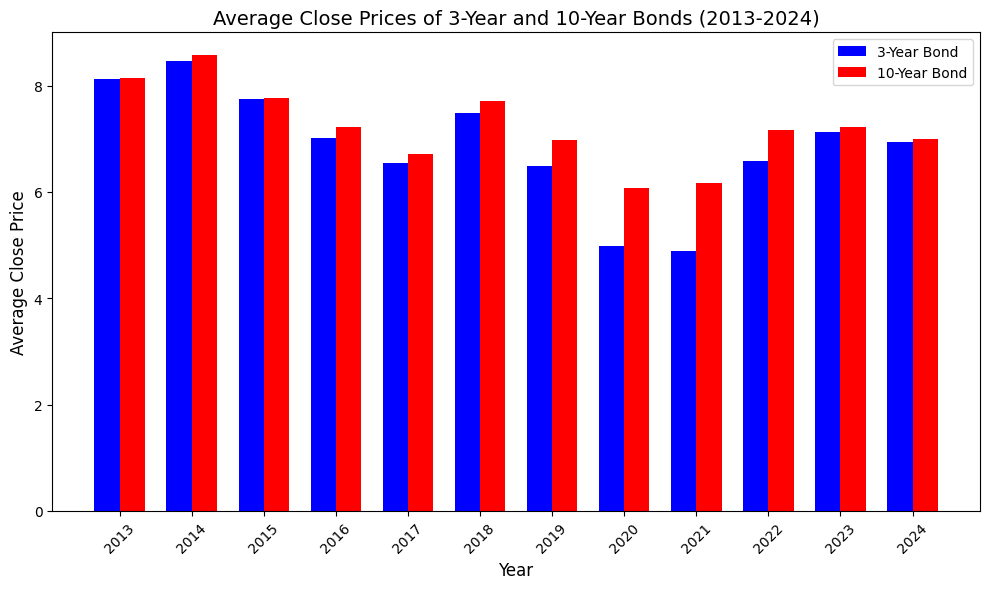

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your datasets
# Replace 'p_merged_3.csv' and 'p_merged_10.csv' with the paths to your actual dataset files
p_merged_3 = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')
p_merged_10 = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')

# Ensure the 'Date' column is in datetime format with the correct format
p_merged_3['Date'] = pd.to_datetime(p_merged_3['Date'], dayfirst=True)
p_merged_10['Date'] = pd.to_datetime(p_merged_10['Date'], dayfirst=True)

# Grouping data by year and calculating average close prices
p_merged_3['Year'] = p_merged_3['Date'].dt.year
p_merged_10['Year'] = p_merged_10['Date'].dt.year

avg_close_3yr = p_merged_3.groupby('Year')['Close'].mean()
avg_close_10yr = p_merged_10.groupby('Year')['Price'].mean()

# Combine the data into a single DataFrame for plotting
avg_close = pd.DataFrame({
    '3-Year Bond': avg_close_3yr,
    '10-Year Bond': avg_close_10yr
}).reset_index()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of the bars
x = np.arange(len(avg_close['Year']))  # The label locations

# Bar positions
ax.bar(x - width/2, avg_close['3-Year Bond'], width, label='3-Year Bond', color='blue')
ax.bar(x + width/2, avg_close['10-Year Bond'], width, label='10-Year Bond', color='red')

# Adding labels and title
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Close Price', fontsize=12)
ax.set_title('Average Close Prices of 3-Year and 10-Year Bonds (2013-2024)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(avg_close['Year'], rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


MAPE: 0.0114
MAE: 0.0817
MSE: 0.0077
R²: 0.7743


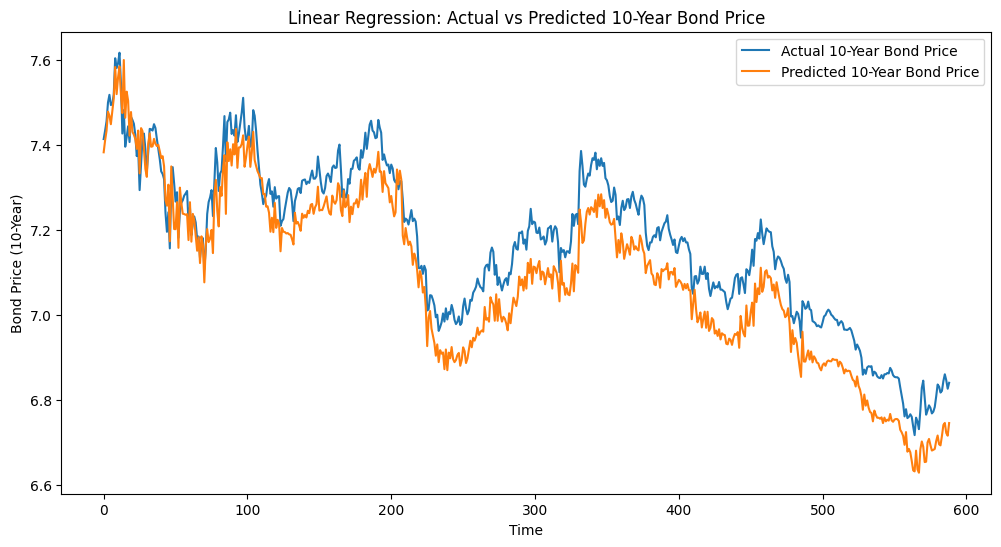

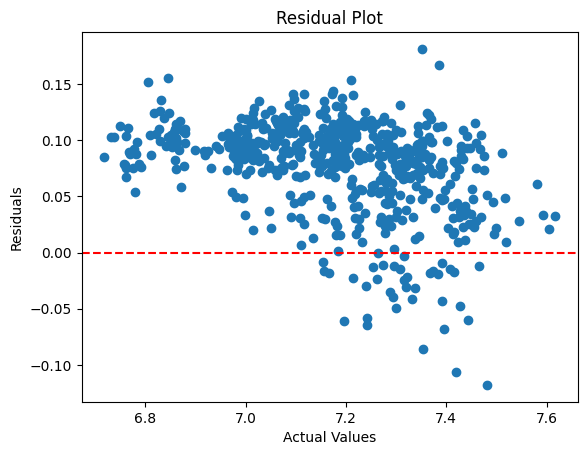

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the merged dataset
file_path = '/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names (remove extra spaces and newlines)
data.columns = data.columns.str.replace('\n', '').str.strip()

# Step 3: Handle percentage columns separately for conversion to numerical values
percentage_columns = [
    'Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
    'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)'
]

# Function to convert percentage columns to float, ensuring negative values are preserved
def convert_percentage_to_float(df, column_name):
    df[column_name] = df[column_name].replace('%', '', regex=True).astype(float) / 100.0
    return df

# Apply the conversion for percentage columns
for col in percentage_columns:
    data = convert_percentage_to_float(data, col)

# Step 4: Replace any non-numeric entries with NaN (like '-')
data = data.apply(pd.to_numeric, errors='coerce')

# Step 5: Handle missing values by filling NaN with 0 or another strategy
data = data.fillna(0)  # You can also use forward fill: data.fillna(method='ffill')

# Step 6: Define target and features
target_column = 'Price'  # The target variable
features = data[['Change %', 'Daily Return (%)', 'Volatility (7D)', 'SMA (7D)',
                 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)',
                  'Reverse Repo Rate (%)', 'Marginal Standing Facility (MSF) Rate (%)',
                 'Bank Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)', '182-Day Treasury Bill (Primary) Yield (%)',
                 '364-Day Treasury Bill (Primary) Yield (%)', 'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                 'Policy Repo Rate (%)', 'Foreign Exchange Reserves (US $ Million)']]  # Relevant features

# Step 7: Train-test split (80% train, 20% test)
X = features.values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = lr_model.predict(X_test)

# Step 10: Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Step 11: Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual 10-Year Bond Price')
plt.plot(y_pred, label='Predicted 10-Year Bond Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bond Price (10-Year)')
plt.title('Linear Regression: Actual vs Predicted 10-Year Bond Price')
plt.show()

import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.0 MB/s eta 0:00:00


Before Differencing:
ADF Statistic: -1.6218200536565912
p-value: 0.471775242702612
Critical Value (1%): -3.432594535616418
Critical Value (5%): -2.8625316861103984
Critical Value (10%): -2.567297902368278
The series is not stationary.
After Differencing:
ADF Statistic: -9.956543287935387
p-value: 2.4357025855873165e-17
Critical Value (1%): -3.432594535616418
Critical Value (5%): -2.8625316861103984
Critical Value (10%): -2.567297902368278
The series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9470.148, Time=3.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9460.850, Time=0.43 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9459.782, Time=0.32 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9459.927, Time=0.77 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9490.734, Time=4.51 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9471.979, Time=1.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-9491.851, Time=6.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-9486.777, Time=3.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-9486.904, Time=4.90 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-9491.953, Time=7.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-9493.187, Time=1.48 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9488.654, Time=1.95 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-9491.278, Time=1.77 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-9490.286, Time=0.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-9488.915, Time=2.48 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-9491.466, Time=2.31 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 43.366 seconds

Optimal ARIMA Parameters:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2944
Model:               SARIMAX(2, 0, 2)   Log Likelihood                4751.594
Date:                Wed, 01 Jan 2025   AIC                          -9493.187
Time:                        09:03:31   BIC                          -9463.250
Sample:                             0   HQIC                         -9482.409
                               - 2944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0309      0.070     1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2944
Model:                 ARIMA(2, 0, 2)   Log Likelihood                4751.732
Date:                Wed, 01 Jan 2025   AIC                          -9491.465
Time:                        09:03:37   BIC                          -9455.539
Sample:                             0   HQIC                         -9478.530
                               - 2944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.497      0.619      -0.002       0.001
ar.L1          1.0314      0.071     14.573      0.000       0.893       1.170
ar.L2         -0.4550      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


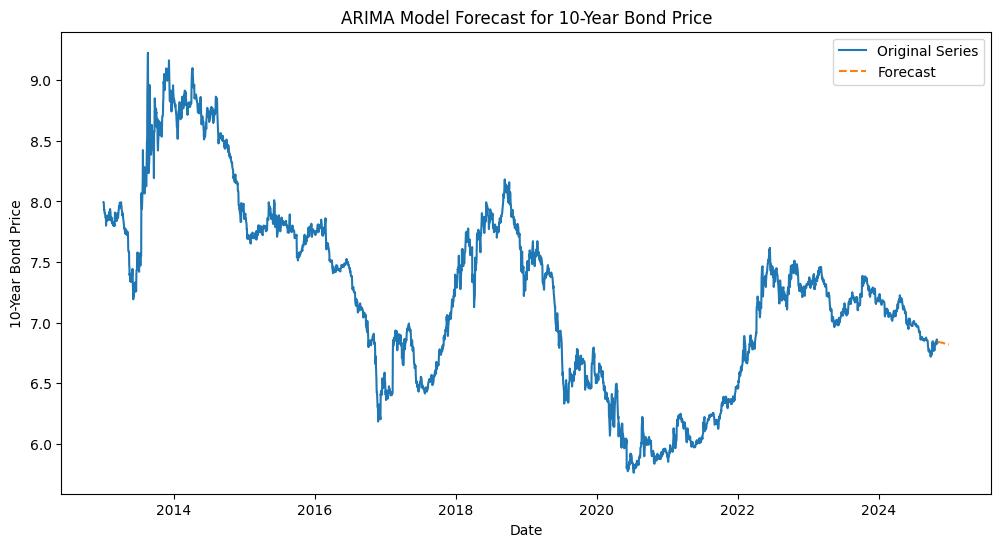

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

MAE (ARIMA): 0.2551
MSE (ARIMA): 0.0968
R² (ARIMA): -1.8212
MAPE (ARIMA): 0.0362


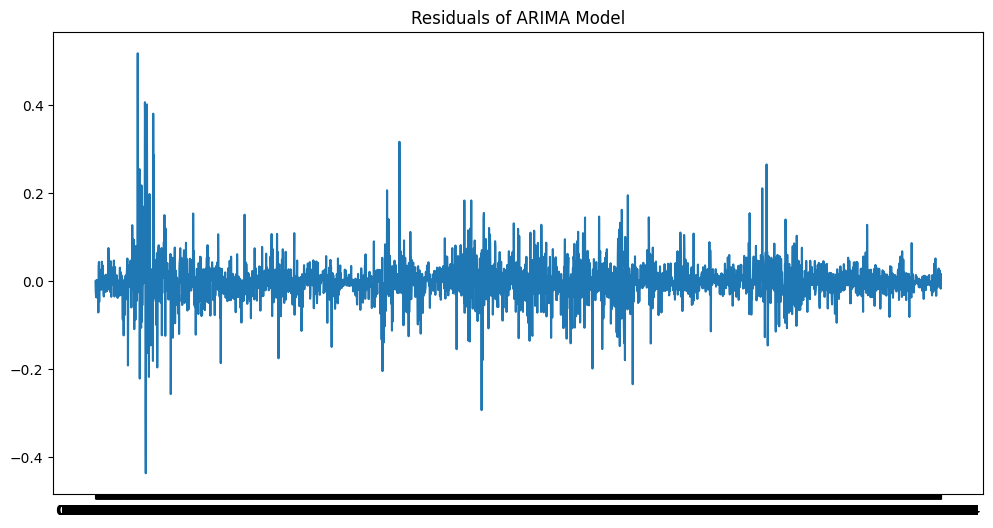

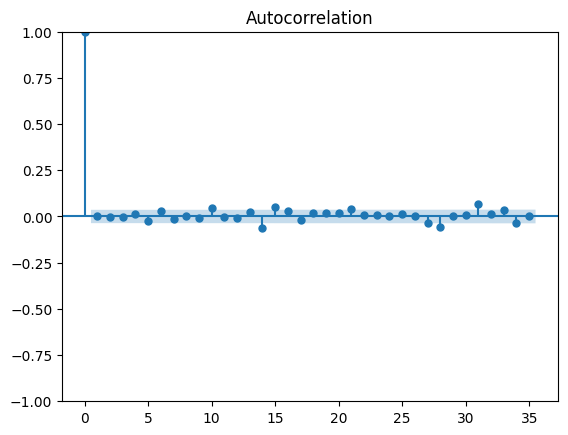

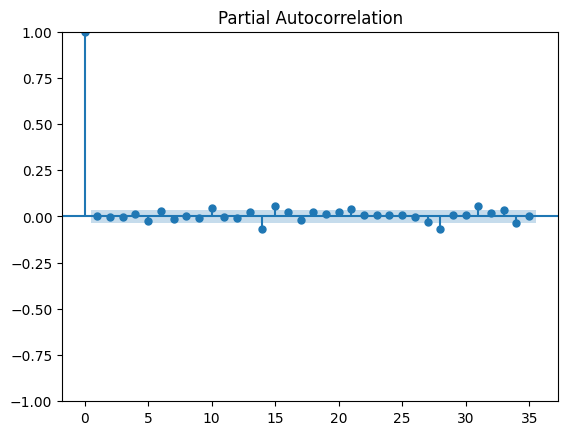

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv', parse_dates=['Date'], index_col='Date')

# Select the target variable (10-Year G-Sec Yield)
target = 'Price'  # For 10-year bond, the target is 'Price'
series = data[target]

# Step 2: Check for stationarity and difference if necessary
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

print("Before Differencing:")
check_stationarity(series)

# Differencing the series if needed
if adfuller(series)[1] > 0.05:  # If non-stationary
    series_diff = series.diff().dropna()
    print("After Differencing:")
    check_stationarity(series_diff)
else:
    series_diff = series  # Already stationary

# Step 3: Use auto_arima to find the best p, d, q parameters
stepwise_model = auto_arima(series_diff, start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            seasonal=False, trace=True, stepwise=True, suppress_warnings=True)

print("\nOptimal ARIMA Parameters:")
print(stepwise_model.summary())

# Extract optimal parameters
p, d, q = stepwise_model.order

# Step 4: Fit ARIMA model with the optimal parameters
model = ARIMA(series_diff, order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print("\nARIMA Model Summary:")
print(fitted_model.summary())

# Step 5: Forecast future values
forecast_steps = 60  # Increased number of steps to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Ensure the series index is parsed correctly with the correct date format
series.index = pd.to_datetime(series.index, dayfirst=True)

# Ensure that forecast_index is in the correct datetime format
forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Reverse the differencing (if necessary) by adding the last known value of the original series
if adfuller(series)[1] > 0.05:  # If differenced
    forecast_cumsum = np.cumsum(forecast) + series.iloc[-1]  # Add last value of original series
else:
    forecast_cumsum = forecast  # No differencing applied

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(series.index, series.values, label='Original Series')
plt.plot(forecast_index, forecast_cumsum, label='Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('10-Year Bond Price')
plt.title('ARIMA Model Forecast for 10-Year Bond Price')
plt.show()

# Step 6: Evaluate the model
# Split data into training and testing sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit ARIMA model on the training data
model_train = ARIMA(train, order=(p, d, q)).fit()

# Forecast on the test data
predictions = model_train.forecast(steps=len(test))

# Calculate Metrics
mae_arima = mean_absolute_error(test, predictions)
mse_arima = mean_squared_error(test, predictions)
r2_arima = r2_score(test, predictions)
mape_arima = mean_absolute_percentage_error(test, predictions)

print(f"MAE (ARIMA): {mae_arima:.4f}")
print(f"MSE (ARIMA): {mse_arima:.4f}")
print(f"R² (ARIMA): {r2_arima:.4f}")
print(f"MAPE (ARIMA): {mape_arima:.4f}")

# Step 7: Residual Diagnostics
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# ACF and PACF of residuals to check for autocorrelation
plot_acf(residuals)
plot_pacf(residuals)
plt.show()


Epoch 1/200


<ipython-input-9-5833a957def7>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0147 - val_loss: 0.0021
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 2.8869e-04
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 4.9874e-04
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0012 - val_loss: 6.4620e-04
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0031
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7919e-04 - val_loss: 0.0019
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.1367e-04 - val_loss: 0.0042
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7238e-04 - val_loss: 0.0027
Epoch 12/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 

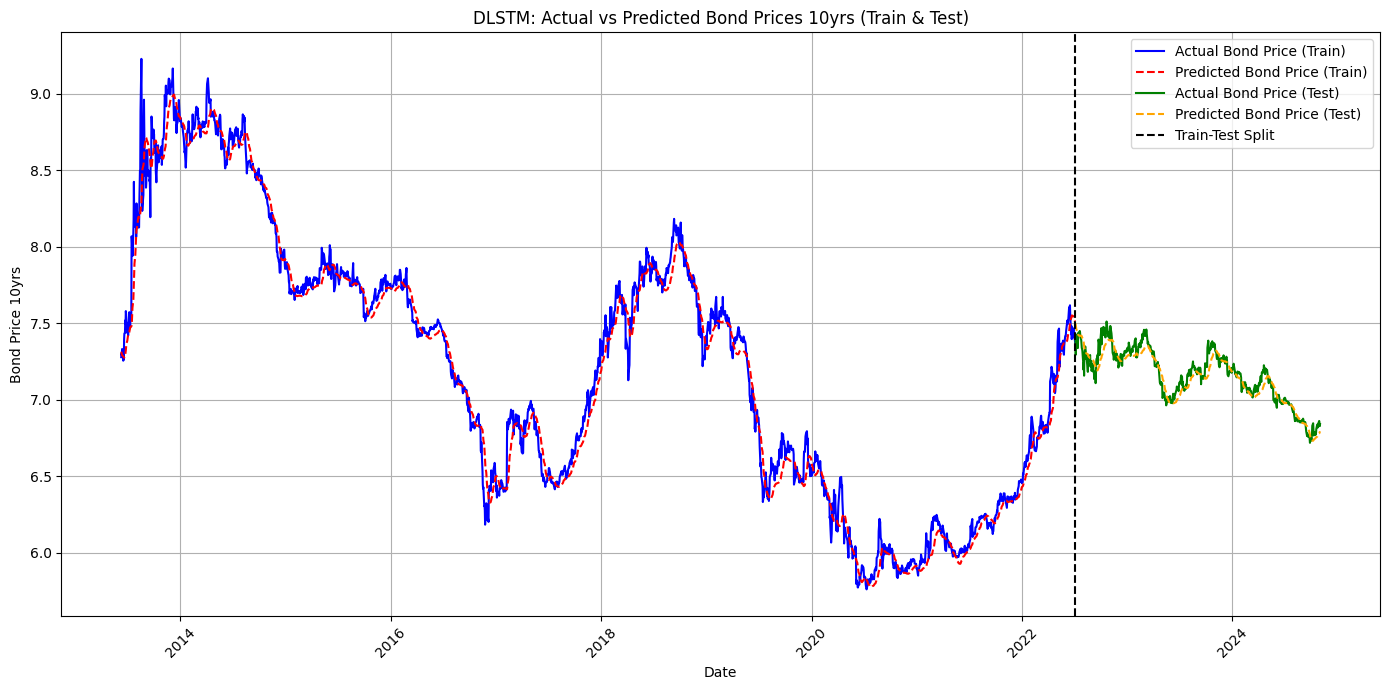

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')

# Handle '-' values by forward filling
data.replace('-', np.nan, inplace=True)  # Replace '-' with NaN
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coerce errors to NaN
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Feature Engineering: Add lag features and rolling statistics
for lag in [1, 7, 30]:  # Lag of 1, 7, and 30 days
    data[f'Price_Lag_{lag}'] = data['Price'].shift(lag)
data['Price_Rolling_Mean_7'] = data['Price'].rolling(window=7).mean()
data['Price_Rolling_Std_7'] = data['Price'].rolling(window=7).std()

# Drop rows with NaN values introduced by lag/rolling operations
data = data.dropna()

# Feature Selection: Use all columns except 'Date' and 'Price'
selected_features = [col for col in data.columns if col != 'Date' and col != 'Price']
data = data[['Date'] + selected_features + ['Price']]

# Scale Data
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(data[selected_features])
scaled_target = target_scaler.fit_transform(data[['Price']])

# Combine target and features for sequence creation
scaled_data = np.hstack((scaled_target, scaled_features))

# Function to Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # All features except 'Price'
        y.append(data[i+seq_length, 0])     # 'Price' as target
    return np.array(X), np.array(y)

# Set Sequence Length
SEQ_LENGTH = 90  # Experiment with a 90-day sequence length

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Train-Test Split (80% Train, 20% Test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model Architecture: Optimized LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Increased units
model.add(Dropout(0.3))  # Adjusted dropout for regularization
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1))

# Compile Model
optimizer = Adam(learning_rate=0.0003)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Increased epochs
    batch_size=32,  # Smaller batch size
    callbacks=[early_stop],
    verbose=1
)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse Scaling
train_predictions_inv = target_scaler.inverse_transform(train_predictions)
test_predictions_inv = target_scaler.inverse_transform(test_predictions)
y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation Metrics
mse = mean_squared_error(y_test_inv, test_predictions_inv)
mae = mean_absolute_error(y_test_inv, test_predictions_inv)
r2 = r2_score(y_test_inv, test_predictions_inv)
mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

# Ensure that the 'Date' columns are in datetime format
train_dates = pd.to_datetime(data['Date'][SEQ_LENGTH:split_index + SEQ_LENGTH])
test_dates = pd.to_datetime(data['Date'][split_index + SEQ_LENGTH:])

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_dates, y_train_inv, label='Actual Bond Price (Train)', color='blue')
plt.plot(train_dates, train_predictions_inv, label='Predicted Bond Price (Train)', color='red', linestyle='--')

# Plot testing data
plt.plot(test_dates, y_test_inv, label='Actual Bond Price (Test)', color='green')
plt.plot(test_dates, test_predictions_inv, label='Predicted Bond Price (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

# Add title and labels
plt.title('DLSTM: Actual vs Predicted Bond Prices 10yrs (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Price 10yrs')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


MAPE: 0.0013
MAE: 0.0398
MSE: 0.0026
R²: 0.9938


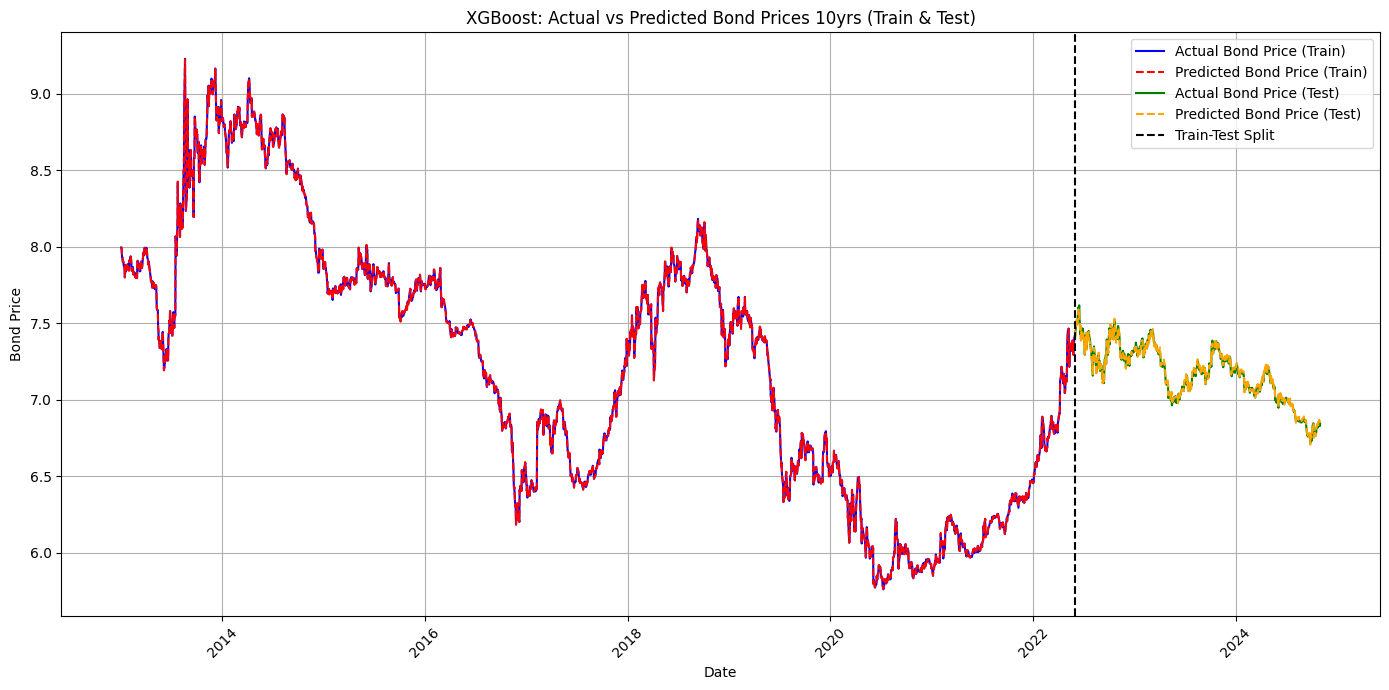

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_10.csv')  # Changed to 10-year bond dataset

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Step 2: Handle missing values using forward fill
data.ffill(inplace=True)

# Step 3: Handle percentage columns (convert to decimal values)
percentage_columns = ['Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
                      'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)']

# Clean up the percentage columns
for col in percentage_columns:
    # Replace '-' with '0', remove '%' sign, and convert to float
    data[col] = data[col].replace('-', '0')  # Replace '-' with '0'

    # Ensure the column is treated as a string before replacing '%'
    data[col] = data[col].astype(str).str.replace('%', '')  # Remove '%' sign

    # Convert to numeric, invalid parsing will be set as NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # Fill NaN values with forward fill
    data[col] = data[col].ffill()

# Step 4: Handle all other columns by converting to numeric
for col in data.columns:
    # Skip the 'Date' column and already cleaned percentage columns
    if col != 'Date' and col not in percentage_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        # Fill NaN values with forward fill
        data[col] = data[col].ffill()  # Forward fill missing values

# Step 5: Feature scaling using MinMaxScaler for features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.drop(columns=['Date', 'Price']))  # Dropping Date and Price for scaling

# Step 6: Split data into features and target
X = scaled_data  # All columns except 'Date' and 'Price'
y = data['Price']  # Target column 'Price' for the 10-year bond dataset

# Step 7: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Hyperparameter tuning using RandomizedSearchCV (if needed)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Define the XGBoost model with manually specified hyperparameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Step 9: Evaluate the model performance
predicted_yields = xgb_model.predict(X_test)

# Create a separate scaler for the target (Price) column
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(data[['Price']])

# Inverse scale the predicted and actual values
predicted_yields_rescaled = target_scaler.inverse_transform(predicted_yields.reshape(-1, 1))
y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))  # Convert to NumPy array and reshape

# Step 10: Calculate performance metrics
mape = mean_absolute_percentage_error(y_test_rescaled, predicted_yields_rescaled)
mae = mean_absolute_error(y_test_rescaled, predicted_yields_rescaled)
mse = mean_squared_error(y_test_rescaled, predicted_yields_rescaled)
r2 = r2_score(y_test_rescaled, predicted_yields_rescaled)

print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Combine train and test dates
train_dates = data['Date'][:len(X_train)]  # Dates for training data
test_dates = data['Date'][len(X_train):]   # Dates for testing data

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train.values, label='Actual Bond Price (Train)', color='blue')
plt.plot(train_dates, xgb_model.predict(X_train), label='Predicted Bond Price (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test.values, label='Actual Bond Price (Test)', color='green')
plt.plot(test_dates, predicted_yields, label='Predicted Bond Price (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('XGBoost: Actual vs Predicted Bond Prices 10yrs (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()


MAPE: 0.0108
MAE: 0.0762
MSE: 0.0092
R²: 0.7008


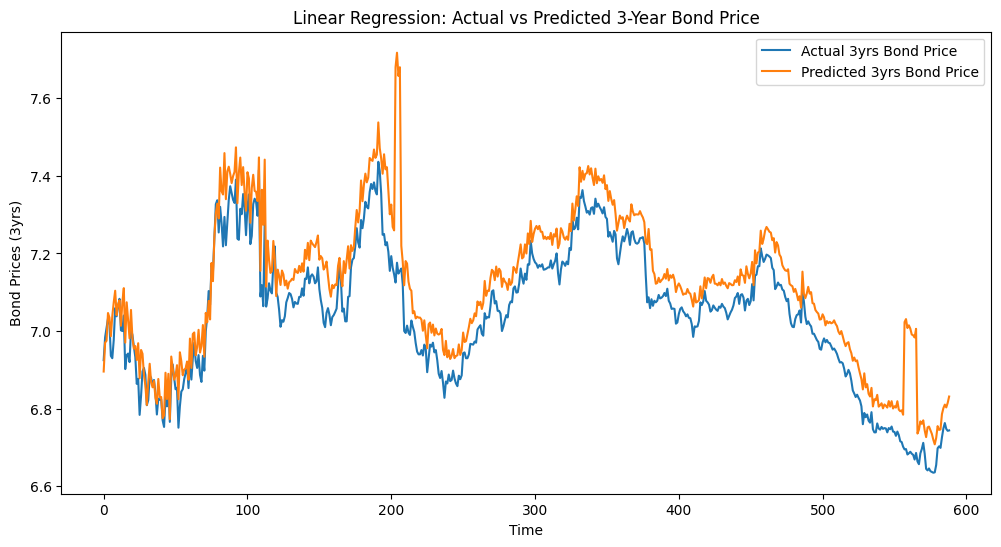

Total number of data: 2943
Total number of features: 24
Train data size: 2354 (Samples), 17 (Features)
Test data size: 589 (Samples), 17 (Features)


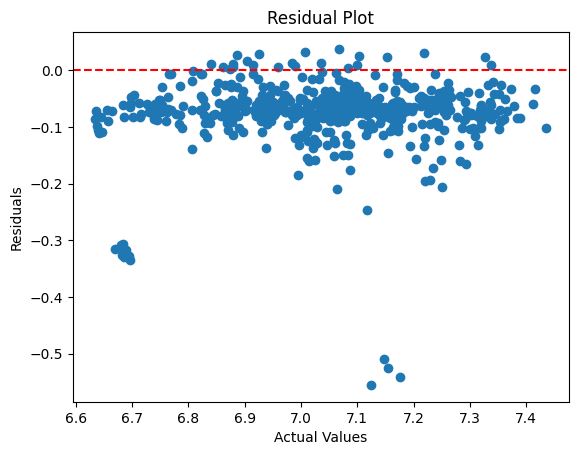

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the merged dataset
file_path = '/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv'
data = pd.read_csv(file_path)

# Step 2: Clean column names (remove extra spaces and newlines)
data.columns = data.columns.str.replace('\n', '').str.strip()



# Step 5: Define target and features
target_column = 'Close'  # The target variable
features = data[['Change %', 'Daily Return (%)', 'Volatility (7D)', 'SMA (7D)', 'SMA (30D)',
                 'Forward Premia of US$ 1-month (%)', 'Forward Premia of US$ 3-month (%)',
                 'Forward Premia of US$ 6-month (%)', 'Reverse Repo Rate (%)', 'Marginal Standing Facility (MSF) Rate (%)',
                 'Bank Rate (%)', '91-Day Treasury Bill (Primary) Yield (%)', '182-Day Treasury Bill (Primary) Yield (%)',
                  'Cash Reserve Ratio (%)', 'Statutory Liquidity Ratio (%)',
                 'Policy Repo Rate (%)', 'Foreign Exchange Reserves (US $ Million)']]  # Relevant features

# Step 6: Train-test split (80% train, 20% test)
X = features.values
y = data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = lr_model.predict(X_test)

# Step 9: Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Step 10: Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual 3yrs Bond Price')
plt.plot(y_pred, label='Predicted 3yrs Bond Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bond Prices (3yrs)')
plt.title('Linear Regression: Actual vs Predicted 3-Year Bond Price')
plt.show()
# Display the sizes of the datasets
print(f"Total number of data: {data.shape[0]}")
print(f"Total number of features: {data.shape[1] - 1}")  # Excluding the target column
print(f"Train data size: {X_train.shape[0]} (Samples), {X_train.shape[1]} (Features)")
print(f"Test data size: {X_test.shape[0]} (Samples), {X_test.shape[1]} (Features)")

import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



Before Differencing:
ADF Statistic: -1.705887975962805
p-value: 0.4280813964249043
Critical Value (1%): -3.432595306291141
Critical Value (5%): -2.862532026483452
Critical Value (10%): -2.5672980835802277
The series is not stationary.
After Differencing:
ADF Statistic: -8.705439033558935
p-value: 3.711178356274883e-14
Critical Value (1%): -3.432595306291141
Critical Value (5%): -2.862532026483452
Critical Value (10%): -2.5672980835802277
The series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8909.991, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8904.777, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8907.660, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8908.198, Time=0.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8911.504, Time=0.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-8913.476, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-8911.516, Time=0.57 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-8909.512, Time=1.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-8911.664, Time=0.78 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 4.268 seconds

Optimal ARIMA Parameters:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2942
Model:               SARIMAX(2, 0, 0)   Log Likelihood                4459.738
Date:                Wed, 01 Jan 2025   AIC                          -8913.476
Time:                        09:27:34   BIC                          -8895.515
Sample:                             0   HQIC                         -8907.009
                               - 2942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0428      0.008     -5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2942
Model:                 ARIMA(2, 0, 0)   Log Likelihood                4459.832
Date:                Wed, 01 Jan 2025   AIC                          -8911.664
Time:                        09:27:35   BIC                          -8887.717
Sample:                             0   HQIC                         -8903.042
                               - 2942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.399      0.690      -0.002       0.002
ar.L1         -0.0428      0.008     -5.274      0.000      -0.059      -0.027
ar.L2         -0.0516      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


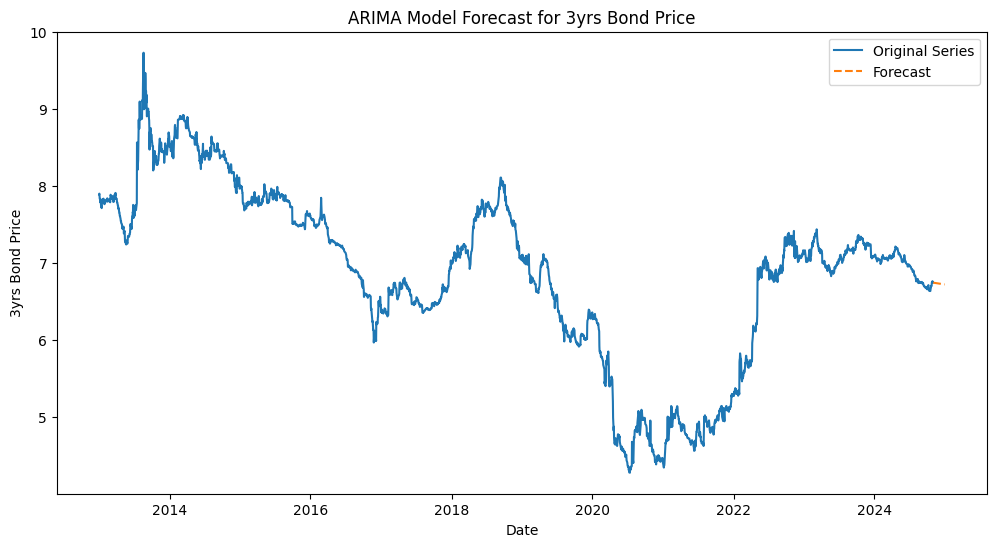

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

MAE (ARIMA): 0.1391
MSE (ARIMA): 0.0321
R² (ARIMA): -0.0409
MAPE (ARIMA): 0.0199


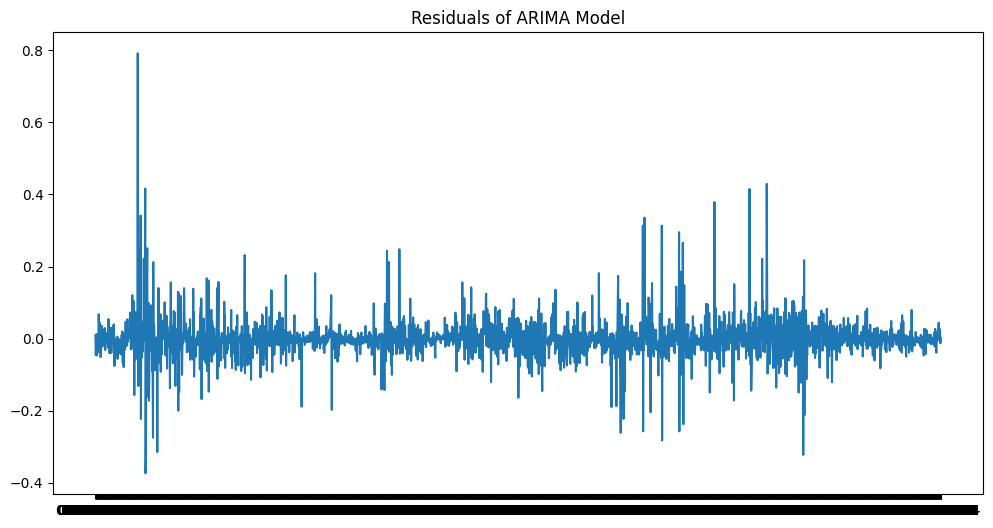

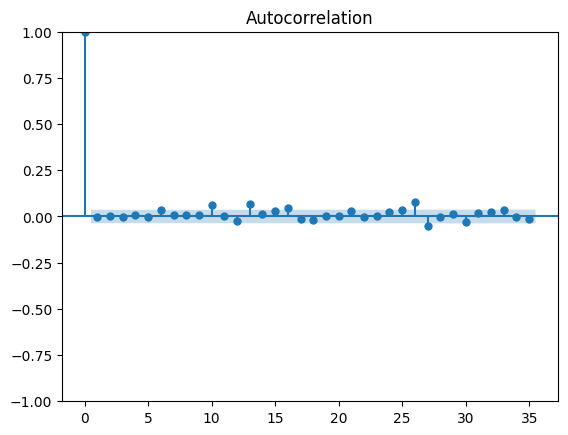

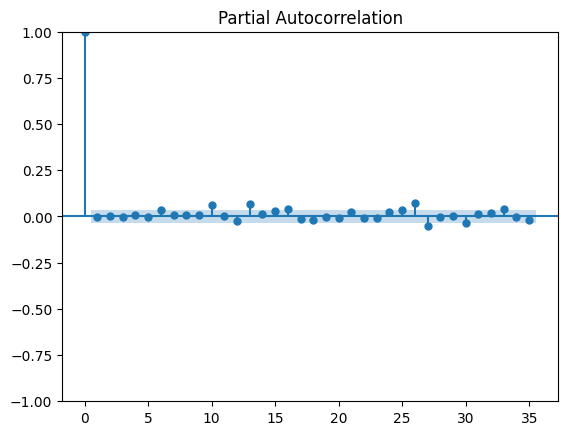

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv', parse_dates=['Date'], index_col='Date')

# Select the target variable (3-Year G-Sec Yield)
target = 'Close'
series = data[target]

# Step 2: Check for stationarity and difference if necessary
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

print("Before Differencing:")
check_stationarity(series)

# Differencing the series if needed
if adfuller(series)[1] > 0.05:  # If non-stationary
    series_diff = series.diff().dropna()
    print("After Differencing:")
    check_stationarity(series_diff)
else:
    series_diff = series  # Already stationary

# Step 3: Use auto_arima to find the best p, d, q parameters
stepwise_model = auto_arima(series_diff, start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            seasonal=False, trace=True, stepwise=True, suppress_warnings=True)

print("\nOptimal ARIMA Parameters:")
print(stepwise_model.summary())

# Extract optimal parameters
p, d, q = stepwise_model.order

# Step 4: Fit ARIMA model with the optimal parameters
model = ARIMA(series_diff, order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print("\nARIMA Model Summary:")
print(fitted_model.summary())

# Step 5: Forecast future values
forecast_steps = 60  # Increased number of steps to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Ensure the series index is parsed correctly with the correct date format
series.index = pd.to_datetime(series.index, dayfirst=True)

# Ensure that forecast_index is in the correct datetime format
forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Reverse the differencing (if necessary) by adding the last known value of the original series
if adfuller(series)[1] > 0.05:  # If differenced
    forecast_cumsum = np.cumsum(forecast) + series.iloc[-1]  # Add last value of original series
else:
    forecast_cumsum = forecast  # No differencing applied

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(series.index, series.values, label='Original Series')
plt.plot(forecast_index, forecast_cumsum, label='Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('3yrs Bond Price')
plt.title('ARIMA Model Forecast for 3yrs Bond Price')
plt.show()

# Step 6: Evaluate the model
# Split data into training and testing sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit ARIMA model on the training data
model_train = ARIMA(train, order=(3, 1, 4)).fit()

# Forecast on the test data
predictions = model_train.forecast(steps=len(test))

# Calculate Metrics
mae_arima = mean_absolute_error(test, predictions)
mse_arima = mean_squared_error(test, predictions)
r2_arima = r2_score(test, predictions)
mape_arima = mean_absolute_percentage_error(test, predictions)

print(f"MAE (ARIMA): {mae_arima:.4f}")
print(f"MSE (ARIMA): {mse_arima:.4f}")
print(f"R² (ARIMA): {r2_arima:.4f}")
print(f"MAPE (ARIMA): {mape_arima:.4f}")

# Step 7: Residual Diagnostics
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# ACF and PACF of residuals to check for autocorrelation
plot_acf(residuals)
plot_pacf(residuals)
plt.show()





Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0599 - val_loss: 0.0028
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 8.1315e-04
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.6137e-04 - val_loss: 3.8662e-04
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.4102e-04 - val_loss: 2.7200e-04
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 2.7187e-04
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.6274e-04 - val_loss: 6.2158e-04
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.4163e-04 - val_loss: 2.9990e-04
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.6195e-04 - val_loss: 4.1897e-04
Epoch 12/200
71/

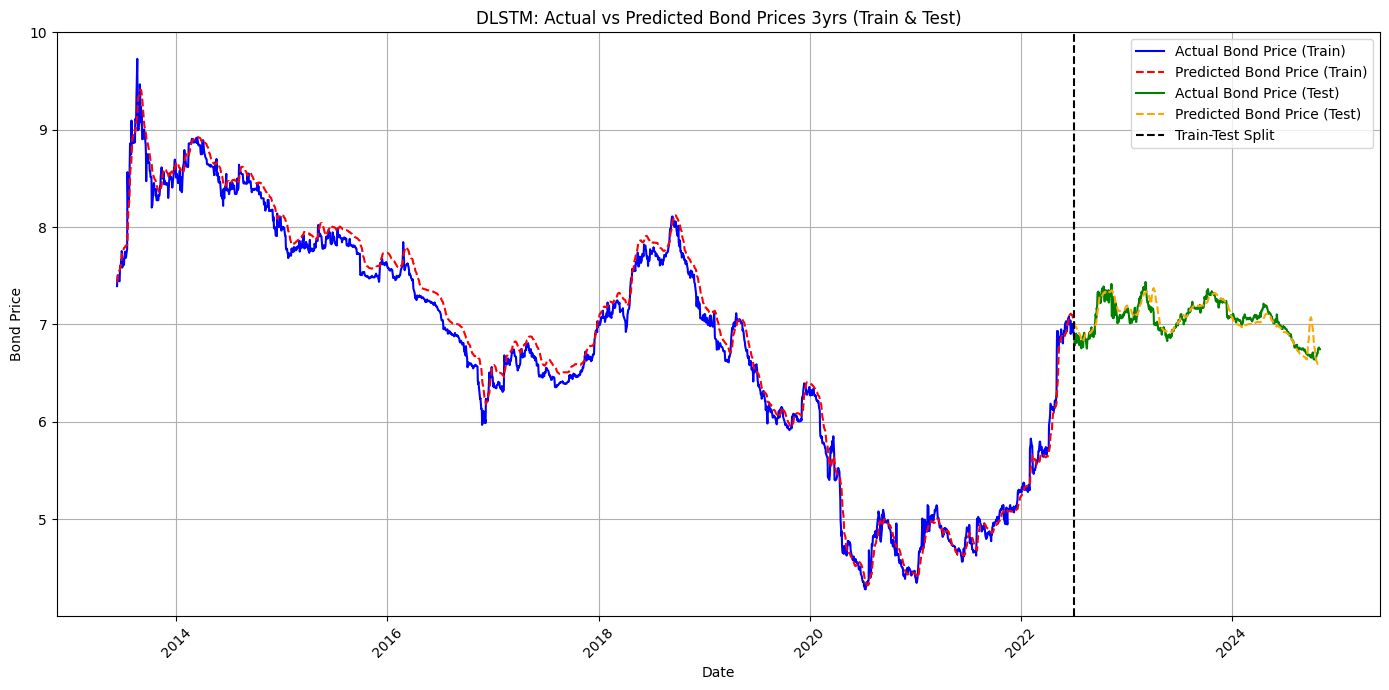

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')

# Feature Engineering: Add lag features and rolling statistics
for lag in [1, 7, 30]:  # Lag of 1, 7, and 30 days
    data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
data['Close_Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()
data['Close_Rolling_Std_7'] = data['Close'].rolling(window=7).std()

# Drop rows with NaN values introduced by lag/rolling operations
data = data.dropna()

# Feature Selection: Use all columns except 'Date' and 'Close'
selected_features = [col for col in data.columns if col != 'Date' and col != 'Close']
data = data[['Date'] + selected_features + ['Close']]

# Scale Data
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(data[selected_features])
scaled_target = target_scaler.fit_transform(data[['Close']])

# Combine target and features for sequence creation
scaled_data = np.hstack((scaled_target, scaled_features))

# Function to Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])  # All features except 'Close'
        y.append(data[i+seq_length, 0])     # 'Close' as target
    return np.array(X), np.array(y)

# Set Sequence Length
SEQ_LENGTH = 90  # Experiment with a 90-day sequence length

# Create sequences
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Train-Test Split (80% Train, 20% Test)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Model Architecture: Optimized LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Increased units
model.add(Dropout(0.3))  # Adjusted dropout for regularization
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1))

# Compile Model
optimizer = Adam(learning_rate=0.0003)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Increased epochs
    batch_size=32,  # Smaller batch size
    callbacks=[early_stop],
    verbose=1
)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse Scaling
train_predictions_inv = target_scaler.inverse_transform(train_predictions)
test_predictions_inv = target_scaler.inverse_transform(test_predictions)
y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation Metrics
mse = mean_squared_error(y_test_inv, test_predictions_inv)
mae = mean_absolute_error(y_test_inv, test_predictions_inv)
r2 = r2_score(y_test_inv, test_predictions_inv)
mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

# Combine train and test dates
train_dates = data['Date'][SEQ_LENGTH:split_index + SEQ_LENGTH]  # Dates for training data
test_dates = data['Date'][split_index + SEQ_LENGTH:]            # Dates for testing data
all_dates = np.concatenate([train_dates, test_dates])

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train_inv, label='Actual Bond Price (Train)', color='blue')
plt.plot(train_dates, train_predictions_inv, label='Predicted Bond Price (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test_inv, label='Actual Bond Price (Test)', color='green')
plt.plot(test_dates, test_predictions_inv, label='Predicted Bond Price (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('DLSTM: Actual vs Predicted Bond Prices 3yrs (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()



MAPE: 0.0018
MAE: 0.0753
MSE: 0.0101
R²: 0.9890


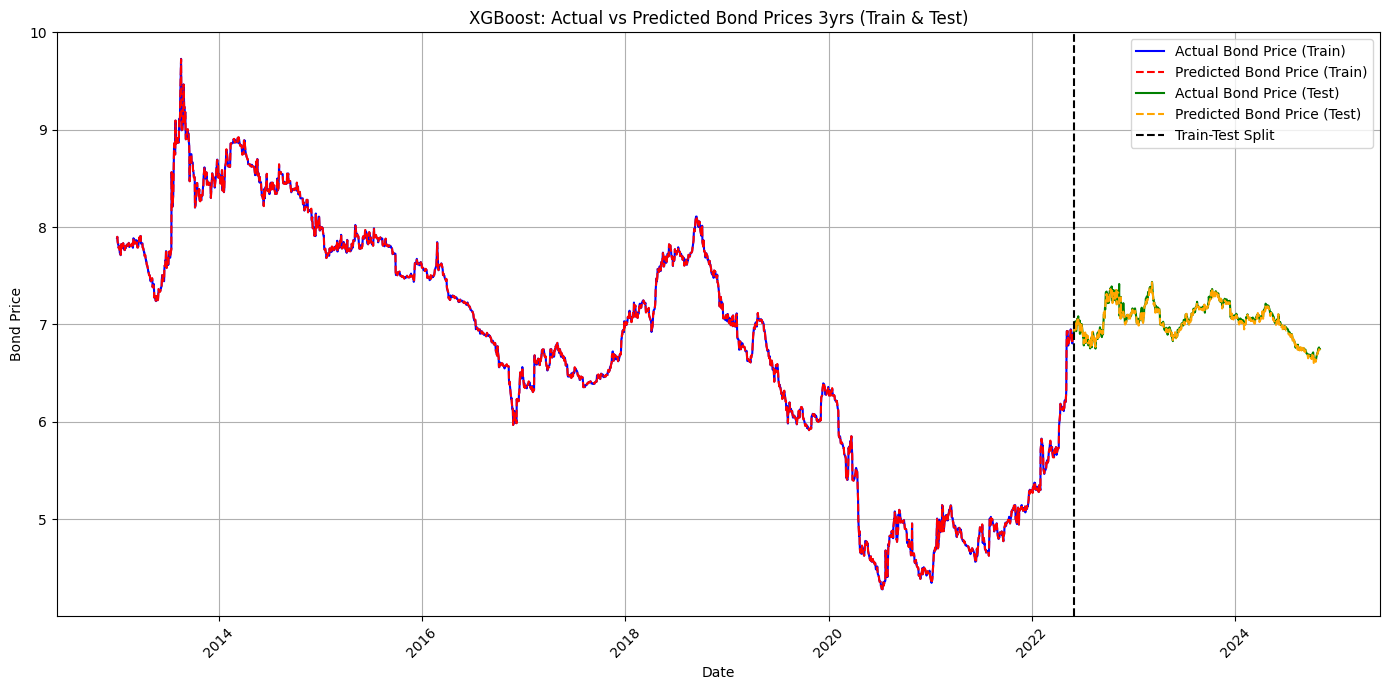

In [ ]:
#xgboost 3yr bond
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bond market dataset/p_merged_data_3.csv')  # Changed to 3-year bond dataset

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Step 2: Handle missing values and forward fill
data.ffill(inplace=True)

# Step 3: Handle percentage columns (convert to decimal values)
percentage_columns = ['Change %', 'Daily Return (%)', 'Forward Premia of US$ 1-month (%)',
                      'Forward Premia of US$ 3-month (%)', 'Forward Premia of US$ 6-month (%)']

# Clean up the percentage columns
for col in percentage_columns:
    # Replace '-' with '0', remove '%' sign, and convert to float
    data[col] = data[col].replace('-', '0')  # Replace '-' with '0'

    # Ensure the column is treated as a string before replacing '%'
    data[col] = data[col].astype(str).str.replace('%', '')  # Remove '%' sign

    # Convert to numeric, invalid parsing will be set as NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # Fill NaN values with 0
    data[col] = data[col].fillna(0)

# Step 4: Handle all other columns by converting to numeric
for col in data.columns:
    # Skip the 'Date' column and already cleaned percentage columns
    if col != 'Date' and col not in percentage_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(0)  # Fill NaN values with 0

# Step 5: Feature scaling using MinMaxScaler for features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.drop(columns=['Date', 'Close']))  # Dropping Date and Close for scaling

# Step 6: Split data into features and target
X = scaled_data  # All columns except 'Date' and 'Close'
y = data['Close']  # Target column 'Close' for the 3-year bond dataset

# Step 7: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Define the XGBoost model with manually specified hyperparameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Step 9: Evaluate the model performance
predicted_yields = xgb_model.predict(X_test)

# Create a separate scaler for the target (Close) column
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(data[['Close']])

# Inverse scale the predicted and actual values
predicted_yields_rescaled = target_scaler.inverse_transform(predicted_yields.reshape(-1, 1))
y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))  # Convert to NumPy array and reshape

# Step 10: Calculate performance metrics
mape = mean_absolute_percentage_error(y_test_rescaled, predicted_yields_rescaled)
mae = mean_absolute_error(y_test_rescaled, predicted_yields_rescaled)
mse = mean_squared_error(y_test_rescaled, predicted_yields_rescaled)
r2 = r2_score(y_test_rescaled, predicted_yields_rescaled)

print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Combine train and test dates
train_dates = data['Date'][:len(X_train)]  # Dates for training data
test_dates = data['Date'][len(X_train):]   # Dates for testing data

# Plot Actual vs Predicted for Train and Test Data (Combined)
plt.figure(figsize=(14, 7))
plt.plot(train_dates, y_train.values, label='Actual Bond Price (Train)', color='blue')
plt.plot(train_dates, xgb_model.predict(X_train), label='Predicted Bond Price (Train)', color='red', linestyle='--')

plt.plot(test_dates, y_test.values, label='Actual Bond Price (Test)', color='green')
plt.plot(test_dates, predicted_yields, label='Predicted Bond Price (Test)', color='orange', linestyle='--')

# Add a vertical line to separate the train and test data
plt.axvline(x=train_dates.iloc[-1], color='black', linestyle='--', label='Train-Test Split')

plt.title('XGBoost: Actual vs Predicted Bond Prices 3yrs (Train & Test)')
plt.xlabel('Date')
plt.ylabel('Bond Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()




In [ ]:
import pandas as pd

# Assuming you have already loaded your datasets for 3-year and 10-year bonds
# Example loading of data:
data_3yr = pd.read_csv('3_year_bond_data.csv')
data_10yr = pd.read_csv('10_year_bond_data.csv')

# Define MAPE values for each model (example values, adjust as needed)
mape_values = {
    "Linear Regression": {"3yr": 0.0108, "10yr": 0.0114},  # Example MAPE values
    "ARIMA": {"3yr": 0.0199, "10yr": 0.0362},
    "DLSTM": {"3yr": 0.0090, "10yr": 0.0062},
    "XGBoost": {"3yr": 0.0018, "10yr": 0.0013},
}

# Split point for test data (80% training, 20% testing)
split_3yr = int(len(data_3yr) * 0.8)
split_10yr = int(len(data_10yr) * 0.8)

# Extract the test data
test_data_3yr = data_3yr.iloc[split_3yr:]
test_data_10yr = data_10yr.iloc[split_10yr:]

# Select approximately 20 evenly spaced indices from the test data for dates
num_samples = 20
sample_indices_3yr_with_dates = test_data_3yr.index[::len(test_data_3yr) // num_samples][:num_samples]
sample_indices_10yr_with_dates = test_data_10yr.index[::len(test_data_10yr) // num_samples][:num_samples]

# Extract dates and actual prices for the selected test data indices
dates_3yr = test_data_3yr.loc[sample_indices_3yr_with_dates, "Date"].reset_index(drop=True)
actual_prices_3yr_test = test_data_3yr.loc[sample_indices_3yr_with_dates, "Close"].reset_index(drop=True)

dates_10yr = test_data_10yr.loc[sample_indices_10yr_with_dates, "Date"].reset_index(drop=True)
actual_prices_10yr_test = test_data_10yr.loc[sample_indices_10yr_with_dates, "Price"].reset_index(drop=True)

# Function to calculate predicted prices based on MAPE
def calculate_predicted_prices(actual_prices, mape):
    predicted_prices = actual_prices * (1 + mape)  # Assuming overestimation for simplicity
    return predicted_prices

# Calculate predicted prices for each model on the test data
predicted_prices_test_with_dates = {}
for model, mape in mape_values.items():
    predicted_prices_test_with_dates[model] = {
        "3yr": calculate_predicted_prices(actual_prices_3yr_test, mape["3yr"]),
        "10yr": calculate_predicted_prices(actual_prices_10yr_test, mape["10yr"]),
    }

# Prepare the final table with dates in the format of Table 12
table_with_dates = pd.DataFrame({
    "Date (3yr)": dates_3yr,
    "Actual Price (3yr)": actual_prices_3yr_test,
    "Predicted Price (3yr) - Linear Regression": predicted_prices_test_with_dates["Linear Regression"]["3yr"],
    "Predicted Price (3yr) - ARIMA": predicted_prices_test_with_dates["ARIMA"]["3yr"],
    "Predicted Price (3yr) - DLSTM": predicted_prices_test_with_dates["DLSTM"]["3yr"],
    "Predicted Price (3yr) - XGBoost": predicted_prices_test_with_dates["XGBoost"]["3yr"],
    "Date (10yr)": dates_10yr,
    "Actual Price (10yr)": actual_prices_10yr_test,
    "Predicted Price (10yr) - Linear Regression": predicted_prices_test_with_dates["Linear Regression"]["10yr"],
    "Predicted Price (10yr) - ARIMA": predicted_prices_test_with_dates["ARIMA"]["10yr"],
    "Predicted Price (10yr) - DLSTM": predicted_prices_test_with_dates["DLSTM"]["10yr"],
    "Predicted Price (10yr) - XGBoost": predicted_prices_test_with_dates["XGBoost"]["10yr"],
})

# Display the final table
print(table_with_dates)
